Diego Vachon Galindo, 261182196
Question 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class LagrangeInterpolation:
    """
    Lagrange interpolation with preprocessing for evaluation
    """
    def __init__(self, nodes, values):
        """ Preprocess the interpolation data """
        self.nodes = np.array(nodes)
        self.values = np.array(values)
        self.n = len(nodes)

        # Precompute denominators for each basis polynomial
        # to avoid recomputing them for every eval point
        self.denominators = np.zeros(self.n)
        for i in range(self.n):
            prod = 1.0
            for j in range(self.n):
                if i != j:
                    prod *= (self.nodes[i] - self.nodes[j])
            self.denominators[i] = prod

    def __call__(self, x):
        """ 
        Evaluate Lagrange interpolation polynomial at point x
        """
        x = np.atleast_1d(x)
        result = np.zeros_like(x, dtype=float)

        for x_idx, x_val in enumerate(x):
            # Compute L_n(f)(x_val)
            poly_sum = 0.0
            for i in range(self.n):
                # Compute i-th Lagrange basis polynomial at x_val
                numerator = 1.0
                for j in range(self.n):
                    if i != j:
                        numerator *= (x_val - self.nodes[j])
                
                # L_i(x_val) = numerator / denominator[i]
                basis_value = numerator / self.denominators[i]

                # Add f(x_i) * L_i(x_val)
                poly_sum += self.values[i] * basis_value

            result[x_idx] = poly_sum

        return result if len(result) > 1 else result[0]
    


Example 1: Interpolating sin(x) on [0, 2*pi]


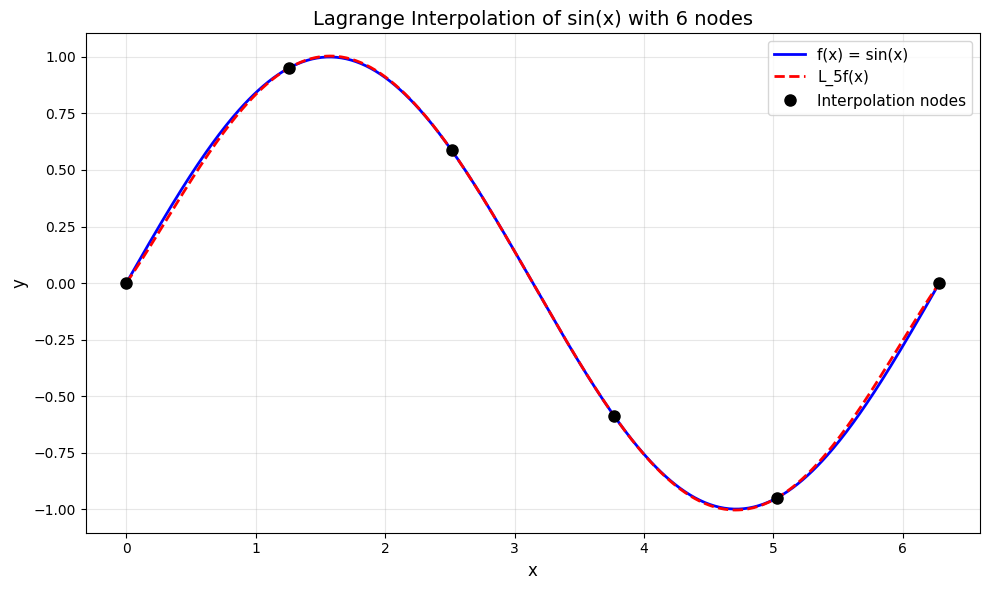


Example 2: Interpolating exp(x) on [-1, 1]


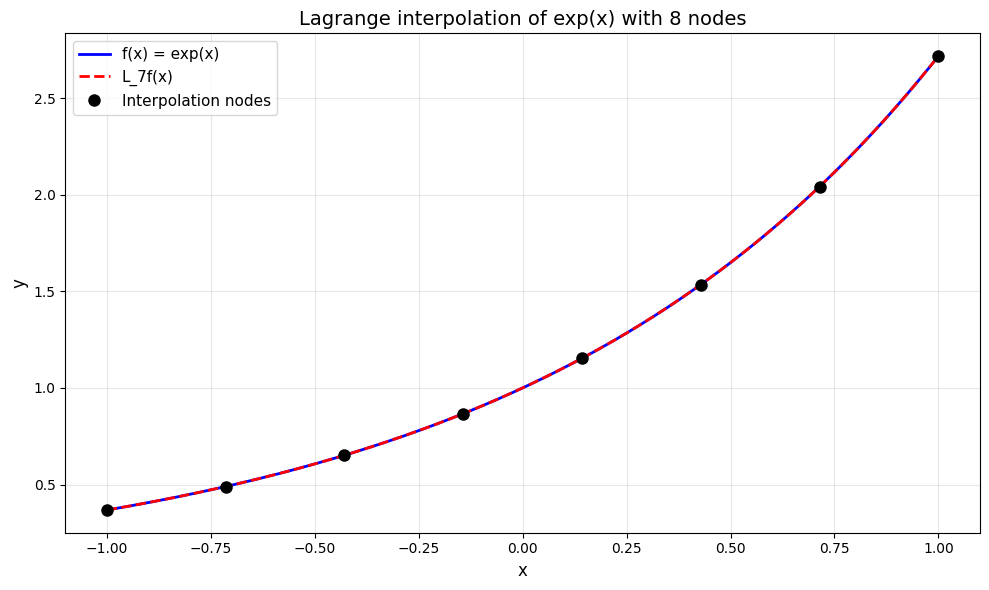


Example 3: Interpolating exp(cos(x)) on [0, 2*pi]


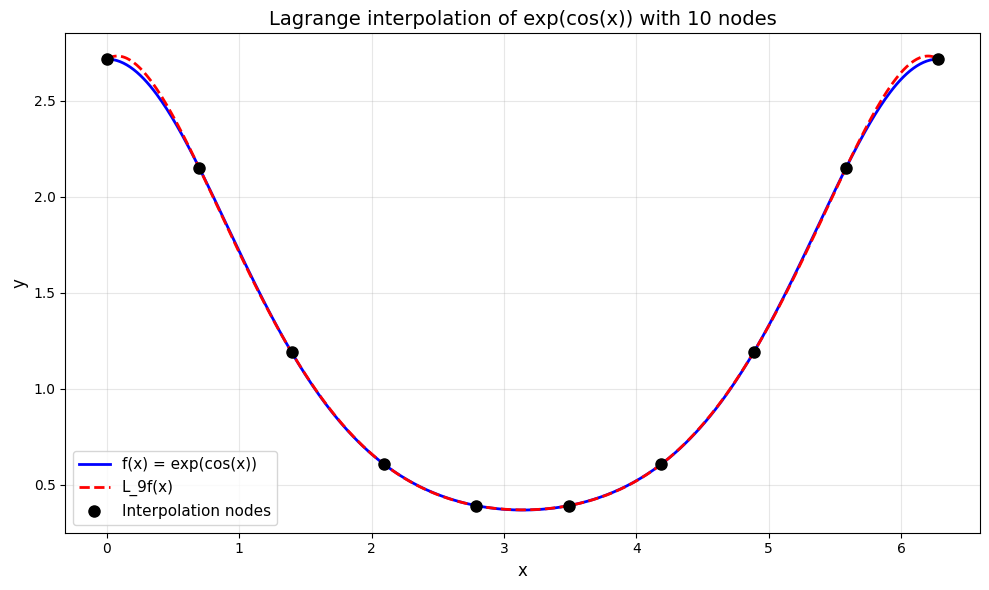

In [4]:
# Example 1: Interpolate sin(x) on [0, 2*pi]
print("Example 1: Interpolating sin(x) on [0, 2*pi]")
nodes1 = np.linspace(0, 2*np.pi, 6)    # 6 nodes equally spaced
values1 = np.sin(nodes1)

L_sin = LagrangeInterpolation(nodes1, values1)

# Plot
x_plot = np.linspace(0, 2*np.pi, 500)
plt.figure(figsize=(10, 6))
plt.plot(x_plot, np.sin(x_plot), 'b-', linewidth=2, label='f(x) = sin(x)')
plt.plot(x_plot, L_sin(x_plot), 'r--', linewidth=2, label=f'L_{len(nodes1)-1}f(x)')
plt.plot(nodes1, values1, 'ko', markersize=8, label='Interpolation nodes')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Lagrange Interpolation of sin(x) with 6 nodes', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Example 2: Interpolate exp(x) on [-1, 1]
print("\nExample 2: Interpolating exp(x) on [-1, 1]")
nodes2 = np.linspace(-1, 1, 8)
values2 = np.exp(nodes2)

L_exp = LagrangeInterpolation(nodes2, values2)

x_plot2 = np.linspace(-1, 1, 500)
plt.figure(figsize=(10, 6))
plt.plot(x_plot2, np.exp(x_plot2), 'b-', linewidth=2, label='f(x) = exp(x)')
plt.plot(x_plot2, L_exp(x_plot2), 'r--', linewidth=2, label=f'L_{len(nodes2)-1}f(x)')
plt.plot(nodes2, values2, 'ko', markersize=8, label='Interpolation nodes')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Lagrange interpolation of exp(x) with 8 nodes', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Example 3: Interpolate exp(cos(x))
print("\nExample 3: Interpolating exp(cos(x)) on [0, 2*pi]")
nodes3 = np.linspace(0, 2*np.pi, 10)
values3 = np.exp(np.cos(nodes3))

L_expcos = LagrangeInterpolation(nodes3, values3)

x_plot3 = np.linspace(0, 2*np.pi, 500)
f_exact = np.exp(np.cos(x_plot3))
plt.figure(figsize=(10, 6))
plt.plot(x_plot3, f_exact, 'b-', linewidth=2, label='f(x) = exp(cos(x))')
plt.plot(x_plot3, L_expcos(x_plot3), 'r--', linewidth=2, label=f'L_{len(nodes3)-1}f(x)')
plt.plot(nodes3, values3, 'ko', markersize=8, label='Interpolation nodes')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Lagrange interpolation of exp(cos(x)) with 10 nodes', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Question 2

Example 1: Interpolating sin(x) on [0, 2*pi]

With 5 nodes:
   Maximum error: 1.807578e-01

With 10 nodes:
   Maxiumum error: 7.225300e-05


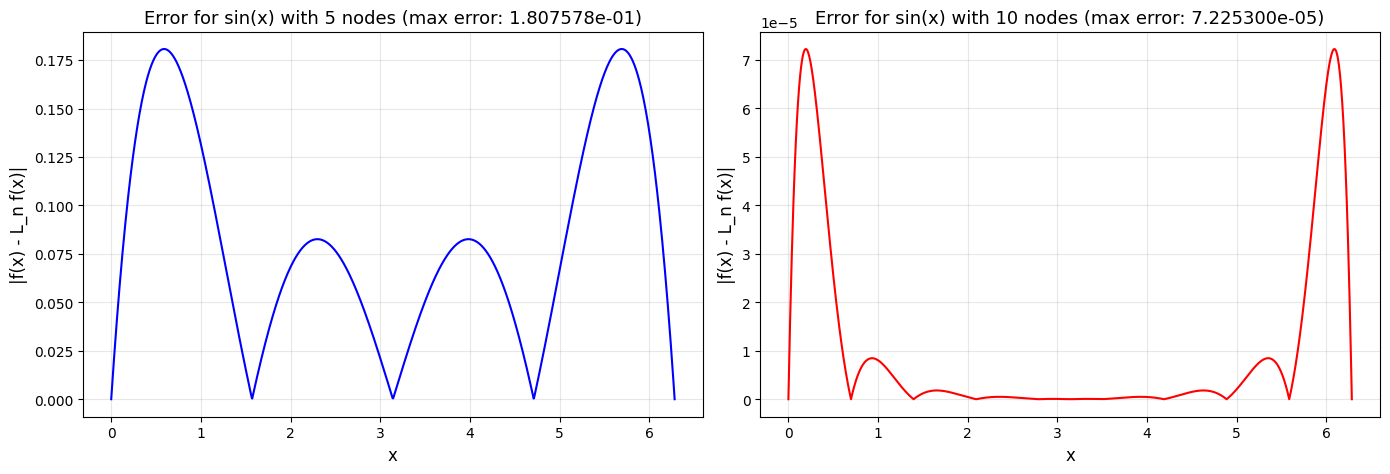

Example 2: Interpolating exp(x) on [-1, 1]

With 6 nodes:
   Max error: 1.121612e-04

With 12 nodes:
   Max error: 1.329470e-11


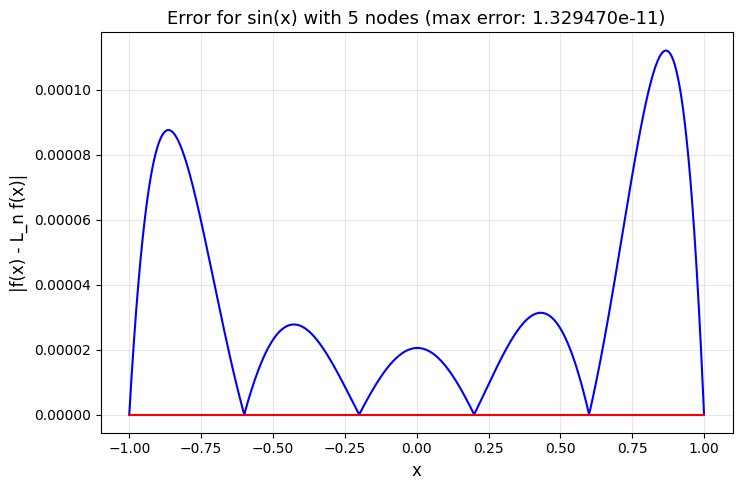

In [20]:
def compute_max_error(f, lagrange_interp, a, b, num_samples=1000):
    """ 
    Compute the max error of Lagrange interpolation over [a, b]
    """
    # Generate uniformly spaced sample points
    sample_points = np.linspace(a, b, num_samples)

    # Evaluate true function and interpolation at sample points
    f_values = f(sample_points)
    interp_values = lagrange_interp(sample_points)

    # Compute absolute errors
    errors = np.abs(f_values - interp_values)

    # Find max error
    max_error = np.max(errors)

    return max_error, sample_points, errors

# Examples
print("Example 1: Interpolating sin(x) on [0, 2*pi]")
a1, b1 = 0, 2*np.pi
f1 = np.sin

# Test with 5 nodes
nodes1_5 = np.linspace(a1, b1, 5)
values1_5 = f1(nodes1_5)
L1_5 = LagrangeInterpolation(nodes1_5, values1_5)
max_err1_5, sample_pts1, errors1_5 = compute_max_error(f1, L1_5, a1, b1, 1000)

print("\nWith 5 nodes:")
print(f"   Maximum error: {max_err1_5:.6e}")

# Test with 10 nodes
nodes1_10 = np.linspace(a1, b1, 10)
values1_10 = f1(nodes1_10)
L1_10 = LagrangeInterpolation(nodes1_10, values1_10)
max_error1_10, _, errors1_10 = compute_max_error(f1, L1_10, a1, b1, 1000)

print(f"\nWith 10 nodes:")
print(f"   Maxiumum error: {max_error1_10:.6e}")

# Visualize the errors
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(sample_pts1, errors1_5, 'b-', linewidth=1.5)
plt.xlabel('x', fontsize=12)
plt.ylabel('|f(x) - L_n f(x)|', fontsize=12)
plt.title(f'Error for sin(x) with 5 nodes (max error: {max_err1_5:.6e})', fontsize=13)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(sample_pts1, errors1_10, 'r-', linewidth=1.5)
plt.xlabel('x', fontsize=12)
plt.ylabel('|f(x) - L_n f(x)|', fontsize=12)
plt.title(f'Error for sin(x) with 10 nodes (max error: {max_error1_10:.6e})', fontsize=13)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Example 2: exp(x) on [-1, 1]
print("Example 2: Interpolating exp(x) on [-1, 1]")
a2, b2 = -1, 1
f2 = np.exp

# Test with 6 nodes
nodes2_6 = np.linspace(a2, b2, 6)
values2_6 = f2(nodes2_6)
L2_6 = LagrangeInterpolation(nodes2_6, values2_6)
max_err2_6, sample_pts2, errors2_6 = compute_max_error(f2, L2_6, a2, b2, 1000)

print(f"\nWith 6 nodes:")
print(f"   Max error: {max_err2_6:.6e}")

# Test with 12 nodes
nodes2_12 = np.linspace(a2, b2, 12)
values2_12 = f2(nodes2_12)
L2_12 = LagrangeInterpolation(nodes2_12, values2_12)
max_err2_12, _, errors2_12 = compute_max_error(f2, L2_12, a2, b2, 1000)

print(f"\nWith 12 nodes:")
print(f"   Max error: {max_err2_12:.6e}")

# Visualize
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1)
plt.plot(sample_pts2, errors2_6, 'b-', linewidth=1.5)
plt.xlabel('x', fontsize=12)
plt.ylabel('|f(x) - L_n f(x)|', fontsize=12)
plt.title(f'Error for sin(x) with 5 nodes (max error: {max_err2_6:.6e})', fontsize=13)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 1)
plt.plot(sample_pts2, errors2_12, 'r-', linewidth=1.5)
plt.xlabel('x', fontsize=12)
plt.ylabel('|f(x) - L_n f(x)|', fontsize=12)
plt.title(f'Error for sin(x) with 5 nodes (max error: {max_err2_12:.6e})', fontsize=13)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


For smooth functions like sin(x) and exp(x), more nodes decreases the error.

Question 3


Computing errors for different polynomial degrees
Degree n   Number of nodes Max Error      
2          3          3.782299e-01   
7          8          3.835227e-02   
12         13         8.222912e-03   
17         18         7.067407e-04   
22         23         5.191820e-05   
27         28         4.935254e-06   
30         31         6.810210e-07   


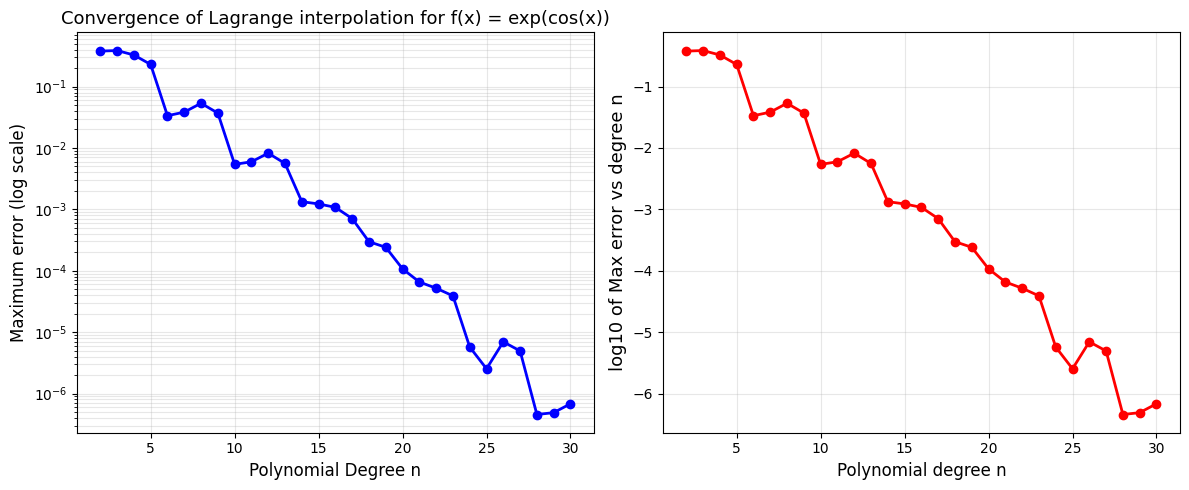

Visualize interpolations for selected degrees


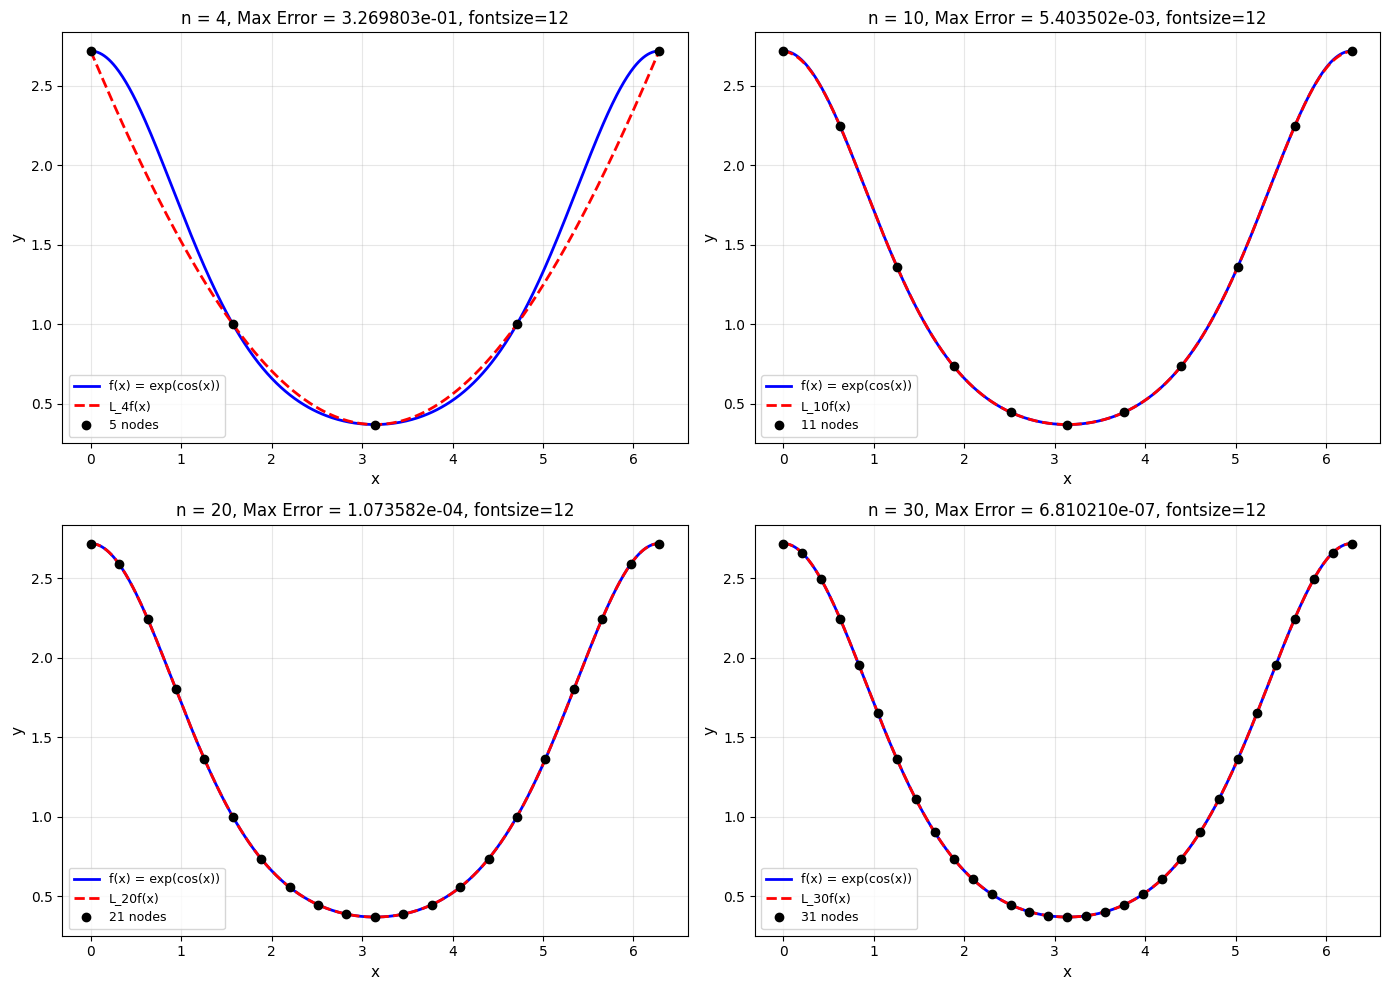

In [6]:
# Define function and interval
a, b = 0, 2*np.pi
f = lambda x: np.exp(np.cos(x))

# Range of polynomial degrees to test
degrees = np.arange(2, 31)
max_errors = []

print("\nComputing errors for different polynomial degrees")
print(f"{'Degree n':<10} {'Number of nodes':<10} {'Max Error':<15}")

for n in degrees:
    # Create n+1 nodes (equally spaced)
    num_nodes = n + 1
    nodes = np.linspace(a, b, num_nodes)
    values = f(nodes)

    # Create Lagrange interp
    L_interp = LagrangeInterpolation(nodes, values)

    # Compute max error
    max_err, _, _ = compute_max_error(f, L_interp, a, b, 1000)
    max_errors.append(max_err)

    # Print every 5th degree
    if n % 5 == 2 or n == degrees[0] or n == degrees[-1]:
        print(f"{n:<10} {num_nodes:<10} {max_err:<15.6e}")

max_errors = np.array(max_errors)

# Plot 1: Log of max error vs polynomial degree
plt.figure(figsize=(12, 5))

# Subplot 1: Log scale for error
plt.subplot(1, 2, 1)
plt.semilogy(degrees, max_errors, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Polynomial Degree n', fontsize=12)
plt.ylabel('Maximum error (log scale)', fontsize=12)
plt.title('Convergence of Lagrange interpolation for f(x) = exp(cos(x))', fontsize=13)
plt.grid(True, alpha=0.3, which='both')

# Subplot 2: Log-log plot to see rate of convergence
plt.subplot(1, 2, 2)
plt.plot(degrees, np.log10(max_errors), 'ro-', linewidth=2, markersize=6)
plt.xlabel('Polynomial degree n', fontsize=12)
plt.ylabel('log10 of Max error vs degree n', fontsize=13)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualize interpolations for selected degrees
print("Visualize interpolations for selected degrees")

selected_degrees = [4, 10, 20, 30]
x_plot = np.linspace(a, b, 500)
f_exact = f(x_plot)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, n in enumerate(selected_degrees):
    num_nodes = n + 1
    nodes = np.linspace(a, b, num_nodes)
    values = f(nodes)

    L_interp = LagrangeInterpolation(nodes, values)
    interp_values = L_interp(x_plot)
    max_err, _, _ = compute_max_error(f, L_interp, a, b, 1000)

    axes[idx].plot(x_plot, f_exact, 'b-', linewidth=2, label='f(x) = exp(cos(x))')
    axes[idx].plot(x_plot, interp_values, 'r--', linewidth=2, label=f'L_{n}f(x)')
    axes[idx].plot(nodes, values, 'ko', markersize=6, label=f'{num_nodes} nodes')
    axes[idx].set_xlabel('x', fontsize=11)
    axes[idx].set_ylabel('y', fontsize=11)
    axes[idx].set_title(f'n = {n}, Max Error = {max_err:.6e}, fontsize=12')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
print("Comments")
print("\n For exp(cos(x)), maximum error decreases exponentially as the polynomial degree n increases")
print(f"   Initial error (n=2): {max_errors[0]:.6e}")
print(f"   Final error (n=30): {max_errors[-1]:.6e}")
print(f"   Error decreased by factor: {max_errors[0]/max_errors[-1]:.2e}")

Comments

 For exp(cos(x)), maximum error decreases exponentially as the polynomial degree n increases
   Initial error (n=2): 3.782299e-01
   Final error (n=30): 6.810210e-07
   Error decreased by factor: 5.55e+05


exp(cos(x)) is infinitely differentiable. All derivatives are bounded on [0, 2*pi]. For analytic functions, Lagrange interpolation with equally spaced nodes convergences exponentially fast. So, for smooth functions on moderate intervals, we can achieve high accuracy with moderate polynomial degrees

Question 4

n =  5 ( 6 nodes): Max Error = 4.326690e-01
n = 10 (11 nodes): Max Error = 1.915633e+00
n = 15 (16 nodes): Max Error = 2.106860e+00
n = 20 (21 nodes): Max Error = 5.976840e+01


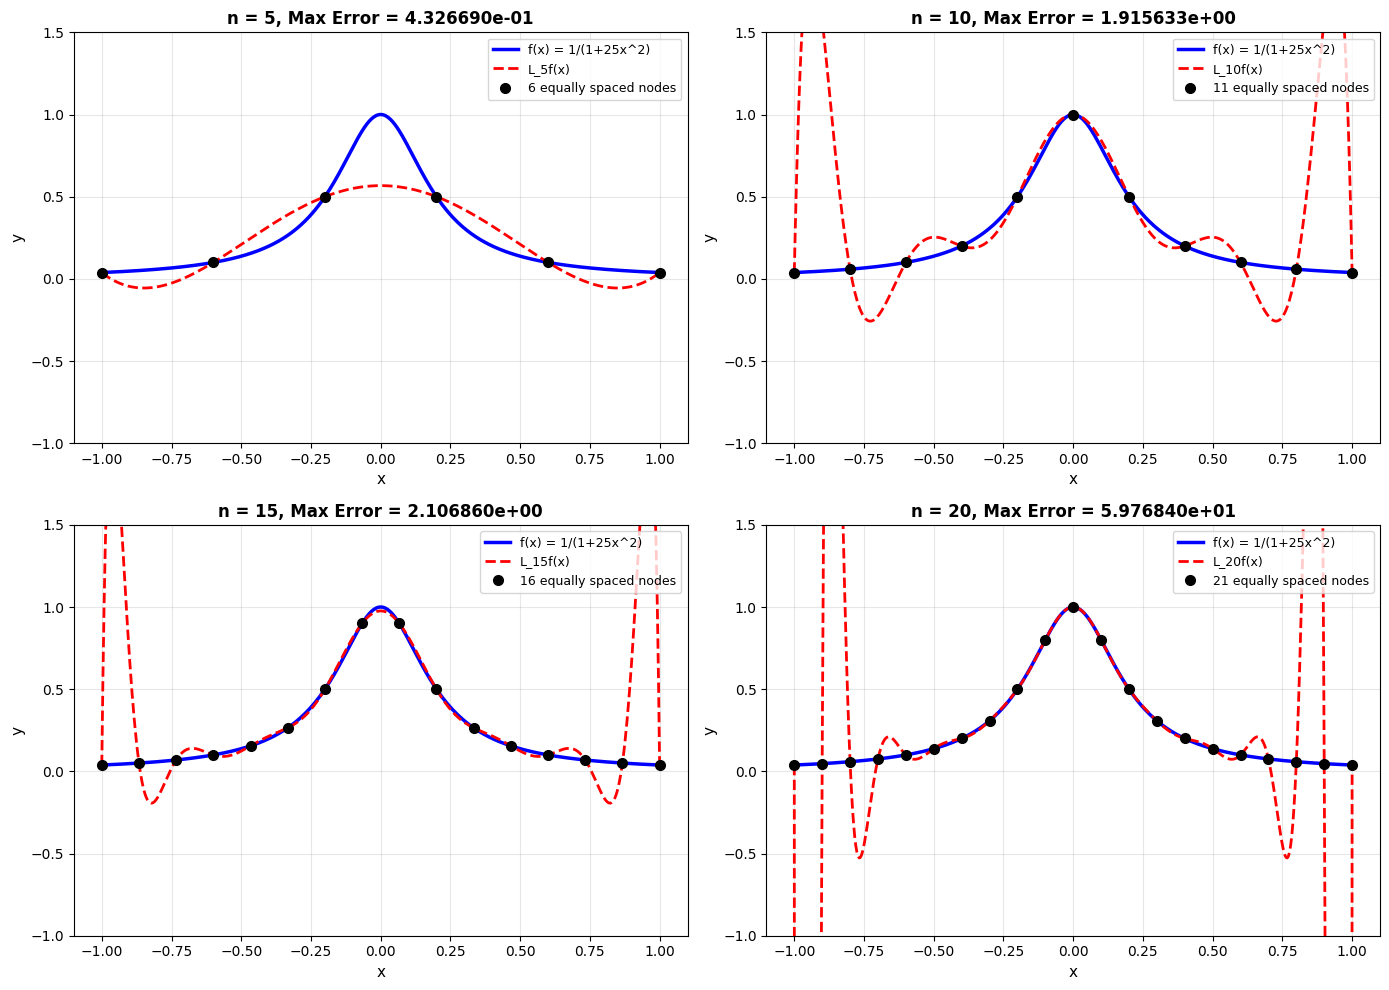


Degree n   Number of nodes Max Error      
2          3          6.462285e-01   
7          8          2.473382e-01   
12         13         3.662935e+00   
17         18         4.223358e+00   
22         23         1.236181e+02   
27         28         1.586921e+02   
30         31         2.384729e+03   


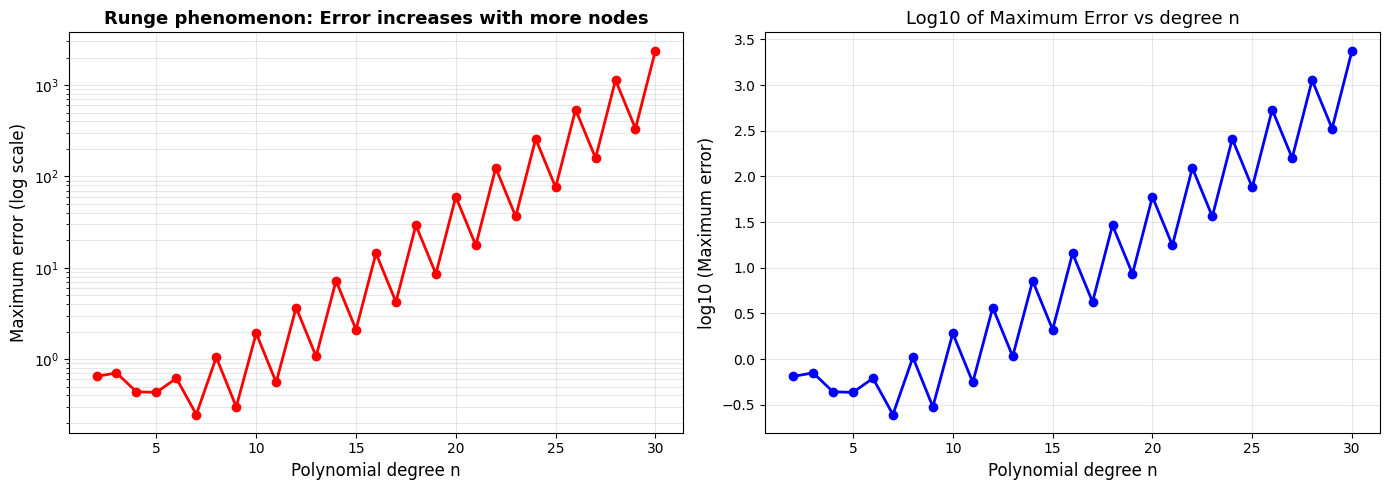

In [7]:
a, b = -1, 1
f_runge = lambda x: 1 / (1+25*x**2)

# Visualize Runge phenomenon for different polynomial degrees
selected_degrees = [5, 10, 15, 20]
x_plot = np.linspace(a, b, 500)
f_exact = f_runge(x_plot)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, n in enumerate(selected_degrees):
    num_nodes = n + 1
    nodes = np.linspace(a, b, num_nodes)
    values = f_runge(nodes)

    L_interp = LagrangeInterpolation(nodes, values)
    interp_values = L_interp(x_plot)
    max_err, _, _ = compute_max_error(f_runge, L_interp, a, b, 1000)

    print(f"n = {n:2d} ({num_nodes:2d} nodes): Max Error = {max_err:.6e}")

    axes[idx].plot(x_plot, f_exact, 'b-', linewidth=2.5, label='f(x) = 1/(1+25x^2)')
    axes[idx].plot(x_plot, interp_values, 'r--', linewidth=2, label=f'L_{n}f(x)')
    axes[idx].plot(nodes, values, 'ko', markersize=7, label=f'{num_nodes} equally spaced nodes')
    axes[idx].set_xlabel('x', fontsize=11)
    axes[idx].set_ylabel('y', fontsize=11)
    axes[idx].set_title(f'n = {n}, Max Error = {max_err:.6e}', fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9, loc='upper right')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim([-1, 1.5])    # Limit y-axis to see oscillations 

plt.tight_layout()
plt.show()

# Part 2: Plot log(error) vs polynomial degree n
degrees = np.arange(2, 31)
max_errors = []

print(f"\n{'Degree n': <10} {'Number of nodes':<10} {'Max Error':<15}")
for n in degrees:
    num_nodes = n + 1
    nodes = np.linspace(a, b, num_nodes)
    values = f_runge(nodes)

    L_interp = LagrangeInterpolation(nodes, values)
    max_err, _, _ = compute_max_error(f_runge, L_interp, a, b, 1000)
    max_errors.append(max_err)

    if n % 5 == 2 or n == degrees[0] or n == degrees[-1]:
        print(f"{n:<10} {num_nodes:<10} {max_err:<15.6e}")

max_errors = np.array(max_errors)

# Plot log(error) vs n
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.semilogy(degrees, max_errors, 'ro-', linewidth=2, markersize=6)
plt.xlabel('Polynomial degree n', fontsize=12)
plt.ylabel('Maximum error (log scale)', fontsize=12)
plt.title('Runge phenomenon: Error increases with more nodes', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, which='both')

plt.subplot(1, 2, 2)
plt.plot(degrees, np.log10(max_errors), 'bo-', linewidth=2, markersize=6)
plt.xlabel('Polynomial degree n', fontsize=12)
plt.ylabel('log10 (Maximum error)',fontsize=12)
plt.title('Log10 of Maximum Error vs degree n', fontsize=13)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
print("Comments")
print("\nError growth")
print(f"    Initial error (n=2): {max_errors[0]:.6e}")
print(f"    Final error (n=30): {max_errors[-1]:.6e}")
print(f"    Error increased by factor: {max_errors[-1]/max_errors[0]:.2e}")

Comments

Error growth
    Initial error (n=2): 6.462285e-01
    Final error (n=30): 2.384729e+03
    Error increased by factor: 3.69e+03


Runge phenomenon is the opposite to question 3 where error decreased.
Also, there are wild oscillations that appear near x = 1 and x = -1 (the endpoints). The center region (near x = 0), it interpolates well. The oscillations grow larger as we add more nodes. 
In comparison with functions in question 3, the runge function has nearby complex singularities. The function 1/(1+25x^2) has poles at x = i/5 and x = -i/5 in complex plane and so, these complex singularities cause problems for real interpolation. The equally spaced nodes cluster poorly for this function.

Question 5

Chebyshev node interpolations
n =  5 ( 6 nodes): Max Error = 5.558874e-01
n = 10 (11 nodes): Max Error = 1.091535e-01
n = 15 (16 nodes): Max Error = 8.309431e-02
n = 20 (21 nodes): Max Error = 1.533338e-02


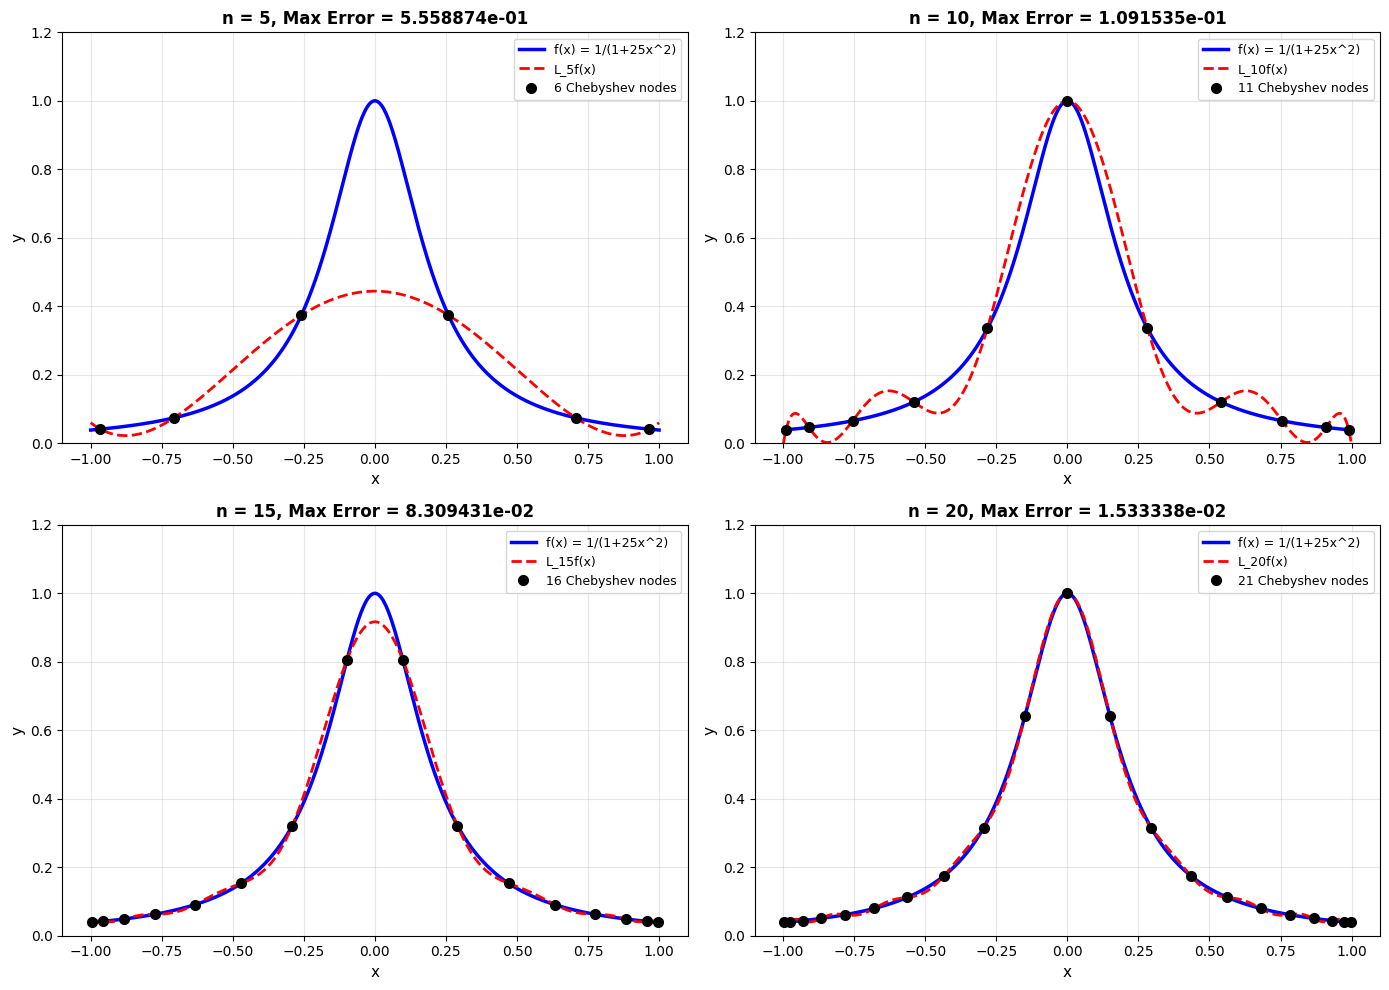


Degree n   Chebynev Error       Equally Spaced Error
2          6.005976e-01         6.462285e-01        
7          3.917179e-01         2.473382e-01        
12         6.920896e-02         3.662935e+00        
17         5.589700e-02         4.223358e+00        
22         1.035890e-02         1.236181e+02        
27         7.668697e-03         1.586921e+02        
30         2.061265e-03         2.384729e+03        


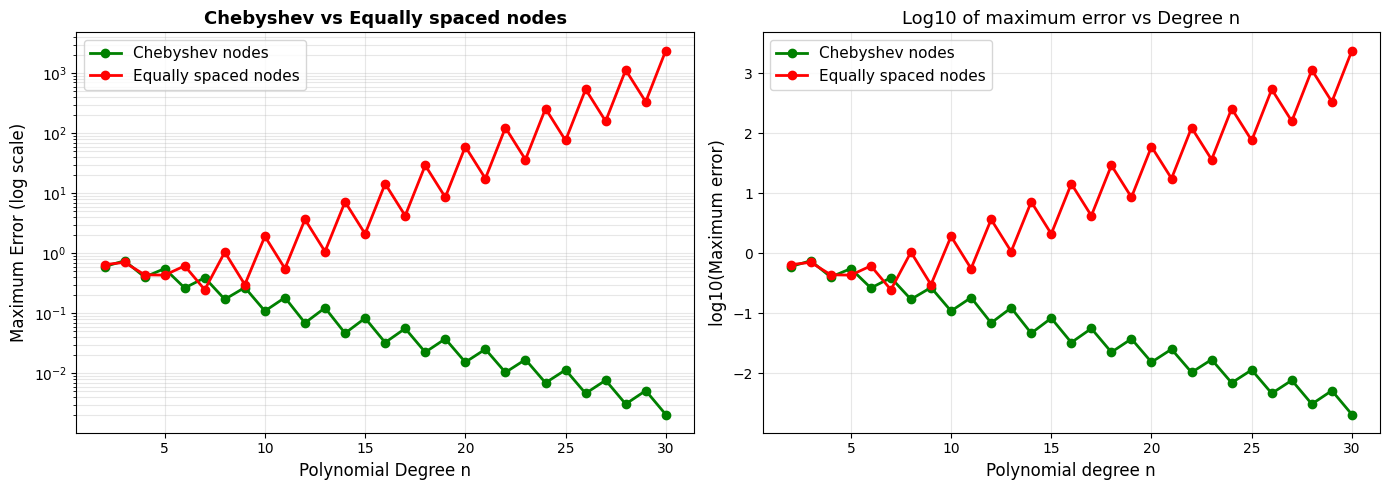

Chebyshev nodes error:    8.309431e-02
Equally spaced nodes error:   2.106860e+00
Improvement factor:       25.36x better


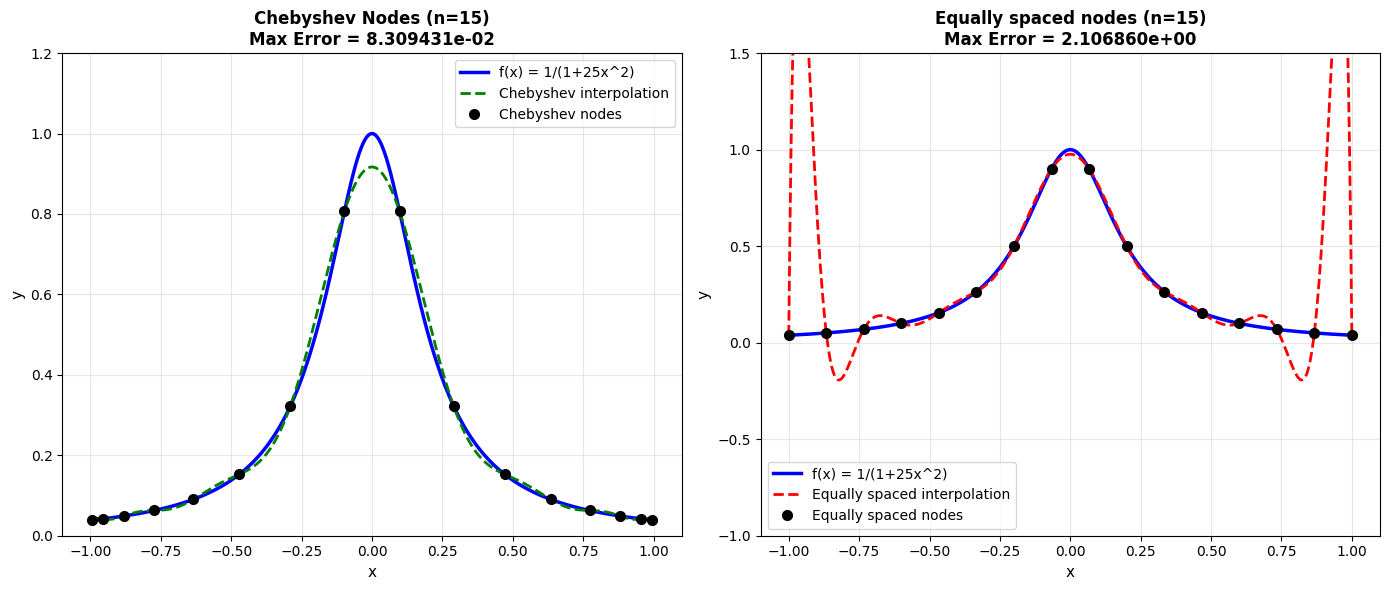

In [9]:
def chebyshev_nodes(n, a, b):
    """ Generate n+1 Chebyshev nodes on interval [a, b] """
    # Chebyshev nodes on [-1, 1]
    i = np.arange(n+1)
    nodes_standard = np.cos((2*i + 1) * np.pi / (2*(n + 1)))

    # Transform to [a, b]
    nodes = (a + b) / 2 + (b - a)/2 * nodes_standard

    return nodes

# Same Runge function as Question 4
a, b = -1, 1
f_runge = lambda x: 1 / (1 + 25*x**2)

# Comparing Chebyshev nodes vs equally spaced nodes
# Part 1: Visualize Chebyshev interpolations for selected degrees
print("Chebyshev node interpolations")
selected_degrees = [5, 10, 15, 20]
x_plot = np.linspace(a, b, 500)
f_exact = f_runge(x_plot)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, n in enumerate(selected_degrees):
    num_nodes = n + 1

    # Generate Chebyshev nodes
    nodes_cheby = chebyshev_nodes(n, a, b)
    values_cheby = f_runge(nodes_cheby)

    L_interp = LagrangeInterpolation(nodes_cheby, values_cheby)
    interp_values = L_interp(x_plot)
    max_err, _, _ = compute_max_error(f_runge, L_interp, a, b, 1000)

    print(f"n = {n:2d} ({num_nodes:2d} nodes): Max Error = {max_err:.6e}")

    axes[idx].plot(x_plot, f_exact, 'b-', linewidth=2.5, label='f(x) = 1/(1+25x^2)')
    axes[idx].plot(x_plot, interp_values, 'r--', linewidth=2, label=f"L_{n}f(x)")
    axes[idx].plot(nodes_cheby, values_cheby, 'ko', markersize=7, label=f'{num_nodes} Chebyshev nodes')
    axes[idx].set_xlabel('x', fontsize=11)
    axes[idx].set_ylabel('y', fontsize=11)
    axes[idx].set_title(f'n = {n}, Max Error = {max_err:.6e}', fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9, loc='upper right')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim([0, 1.2])

plt.tight_layout()
plt.show()

# Part 2: Compare errors (Chebyshev vs Equally spaced)
degrees = np.arange(2, 31)
max_errors_cheby = []
max_errors_equal = []

print(f"\n{'Degree n':<10} {'Chebynev Error':<20} {'Equally Spaced Error':<20}")

for n in degrees:
    num_nodes = n + 1

    # Chebyshev nodes
    nodes_cheby = chebyshev_nodes(n, a, b)
    values_cheby = f_runge(nodes_cheby)
    L_cheby = LagrangeInterpolation(nodes_cheby, values_cheby)
    max_err_cheby, _, _ = compute_max_error(f_runge, L_cheby, a, b, 1000)
    max_errors_cheby.append(max_err_cheby)

    # Equally spaced nodes
    nodes_equal = np.linspace(a, b, num_nodes)
    values_equal = f_runge(nodes_equal)
    L_equal = LagrangeInterpolation(nodes_equal, values_equal)
    max_err_equal, _, _ = compute_max_error(f_runge, L_equal, a, b, 1000)
    max_errors_equal.append(max_err_equal)

    if n % 5 == 2 or n == degrees[0] or n == degrees[-1]:
        print(f"{n:<10} {max_err_cheby:<20.6e} {max_err_equal:<20.6e}")

max_errors_cheby = np.array(max_errors_cheby)
max_errors_equal = np.array(max_errors_equal)

# Part 3: Plot log (error) comparison

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.semilogy(degrees, max_errors_cheby, 'go-', linewidth=2, markersize=6, label='Chebyshev nodes')
plt.semilogy(degrees, max_errors_equal, 'ro-', linewidth=2, markersize=6, label='Equally spaced nodes')
plt.xlabel('Polynomial Degree n', fontsize=12)
plt.ylabel('Maximum Error (log scale)', fontsize=12)
plt.title('Chebyshev vs Equally spaced nodes', fontsize=13, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, which='both')

plt.subplot(1, 2, 2)
plt.plot(degrees, np.log10(max_errors_cheby), 'go-', linewidth=2, markersize=6, label='Chebyshev nodes')
plt.plot(degrees, np.log10(max_errors_equal), 'ro-', linewidth=2, markersize=6, label='Equally spaced nodes')
plt.xlabel('Polynomial degree n', fontsize=12)
plt.ylabel('log10(Maximum error)', fontsize=12)
plt.title('Log10 of maximum error vs Degree n', fontsize=13)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Comparison for specific degree
n_compare = 15
num_nodes = n_compare + 1

# Chebyshev
nodes_cheby = chebyshev_nodes(n_compare, a, b)
values_cheby = f_runge(nodes_cheby)
L_cheby = LagrangeInterpolation(nodes_cheby, values_cheby)
interp_cheby = L_cheby(x_plot)
max_err_cheby, _, _ = compute_max_error(f_runge, L_cheby, a, b, 1000)

# Equally spaced
nodes_equal = np.linspace(a, b, num_nodes)
values_equal = f_runge(nodes_equal)
L_equal = LagrangeInterpolation(nodes_equal, values_equal)
interp_equal = L_equal(x_plot)
max_err_equal, _, _ = compute_max_error(f_runge, L_equal, a, b, 1000)

print(f"Chebyshev nodes error:    {max_err_cheby:.6e}")
print(f"Equally spaced nodes error:   {max_err_equal:.6e}")
print(f"Improvement factor:       {max_err_equal/max_err_cheby:.2f}x better")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x_plot, f_exact, 'b-', linewidth=2.5, label='f(x) = 1/(1+25x^2)')
plt.plot(x_plot, interp_cheby, 'g--', linewidth=2, label='Chebyshev interpolation')
plt.plot(nodes_cheby, values_cheby, 'ko', markersize=7, label='Chebyshev nodes')
plt.xlabel('x', fontsize=11)
plt.ylabel('y', fontsize=11)
plt.title(f'Chebyshev Nodes (n={n_compare})\nMax Error = {max_err_cheby:.6e}',
          fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.ylim([0, 1.2])

plt.subplot(1, 2, 2)
plt.plot(x_plot, f_exact, 'b-', linewidth=2.5, label='f(x) = 1/(1+25x^2)')
plt.plot(x_plot, interp_equal, 'r--', linewidth=2, label='Equally spaced interpolation')
plt.plot(nodes_equal, values_equal, 'ko', markersize=7, label='Equally spaced nodes')
plt.xlabel('x', fontsize=11)
plt.ylabel('y', fontsize=11)
plt.title(f'Equally spaced nodes (n={n_compare})\nMax Error = {max_err_equal:.6e}',
          fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.ylim([-1, 1.5])

plt.tight_layout()
plt.show()

In [10]:
print("Comments")
print("\nError behavior with Chebyshev nodes:")
print(f"    Initial error (n=2): {max_errors_cheby[0]:.6e}")
print(f"    Final error (n=30): {max_errors_cheby[-1]:.6e}")
print("     Chebyshev nodes show exponential convergence")

print("\nComparison with equally spaced nodes:")
print(f"    Equally spaced: error grows from {max_errors_equal[0]:.2e} to {max_errors_equal[-1]:.2e}")
print(f"    Chebyshev: Error decreases from {max_errors_cheby[0]:.2e} to {max_errors_cheby[-1]:.2e}")
print(f"    At n=30: Chebyshev is {max_errors_equal[-1]/max_errors_cheby[-1]:.2e}x better")


Comments

Error behavior with Chebyshev nodes:
    Initial error (n=2): 6.005976e-01
    Final error (n=30): 2.061265e-03
     Chebyshev nodes show exponential convergence

Comparison with equally spaced nodes:
    Equally spaced: error grows from 6.46e-01 to 2.38e+03
    Chebyshev: Error decreases from 6.01e-01 to 2.06e-03
    At n=30: Chebyshev is 1.16e+06x better


Also, there is no oscillation at endpoints. Chebyshev interpolation remains smooth throughout [-1, 1]. There is no wild oscillation near x = 1 and x = -1, the interpolation matches visually the function well.
So, for polynomial interpolation, always prefer Chebyshev nodes, they work well even for functions with nearby singularities. 

Question 6

In [ ]:
class PiecewiseLinearInterpolation:
    """ Piecewise linear interpolation with equally spaced nodes """
    def __init__(self, nodes, values):
        """ Initialize piecewise linear interpolation """
        self.nodes = np.array(nodes)
        self.values = np.array(values)
        self.n = len(nodes)

    def __call__(self, x):
        """ Evaluate piecewise linear interpolation at point(s) x """
        x = np.atleast_1d(x)
        result = np.zeros_like(x, dtype=float)

        for idx, x_val in enumerate(x):
            # Find which interval x_val belongs to searchsorted
            # finds the index where x_val would be inserted
            i = np.searchsorted(self.nodes, x_val, side='right') - 1
            
            # Handle edge cases
            if i < 0:
                # x_val is before first node -> use first segment
                i = 0
            elif i >= self.n - 1:
                # x_val is after last node -> use last segment
                i = self.n - 2

            # Linear interpolation in interval [nodes[i], nodes[i+1]]
            x0, x1 = self.nodes[i], self.nodes[i+1]
            f0, f1 = self.values[i], self.values[i+1]

            # Linear formula: f(x) = f0 + (f1-f0)/(x1-x0) *(x-x0)
            slope = (f1 - f0) / (x1 - x0)
            result[idx] = f0 + slope * (x_val - x0)
        
        return result if len(result) > 1 else result[0]
    
def compute_max_error(f, interp, a, b, num_samples=1000):
    """ Compute maximum error over [a, b] """
    sample_points = np.linspace(a, b, num_samples)
    f_values = f(sample_points)
    interp_values = interp(sample_points)
    errors = np.abs(f_values - interp_values)
    max_error = np.max(errors)
    return max_error, sample_points, errors





Example 1: Piecewise linear interpolation of sin(x) on [0, 2*pi]
 5 nodes: Max Error = 2.105137e-01
10 nodes: Max Error = 5.939733e-02
20 nodes: Max Error = 1.358997e-02
40 nodes: Max Error = 3.237599e-03


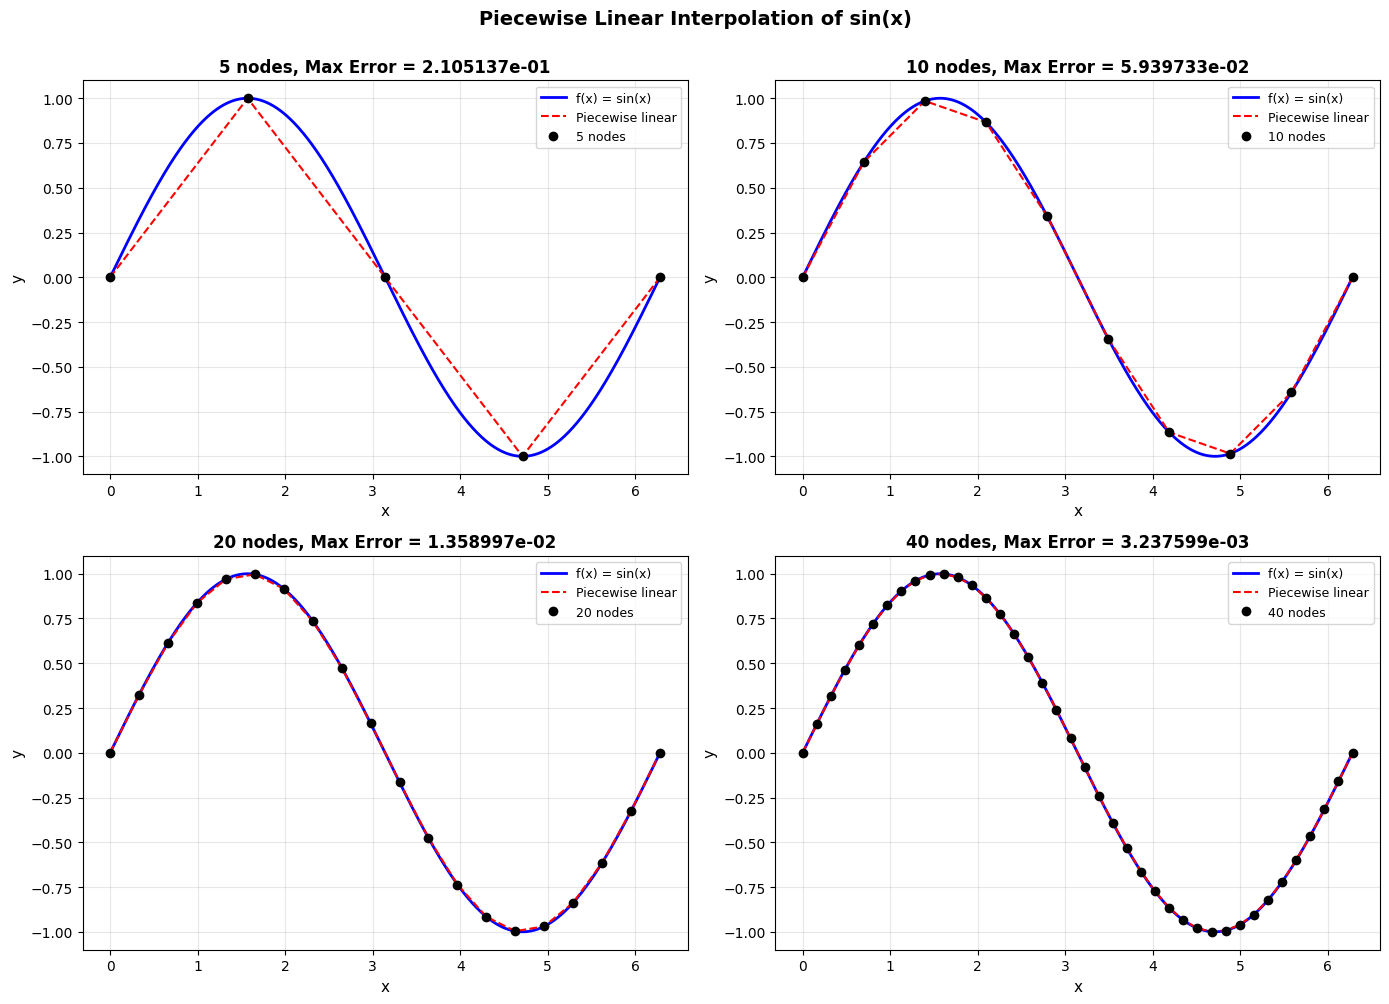


Example 2: Piecewise linear interpolation of Runge function
 5 nodes: Max Error = 1.802304e-01
10 nodes: Max Error = 2.358240e-01
20 nodes: Max Error = 6.474179e-02
40 nodes: Max Error = 1.614571e-02


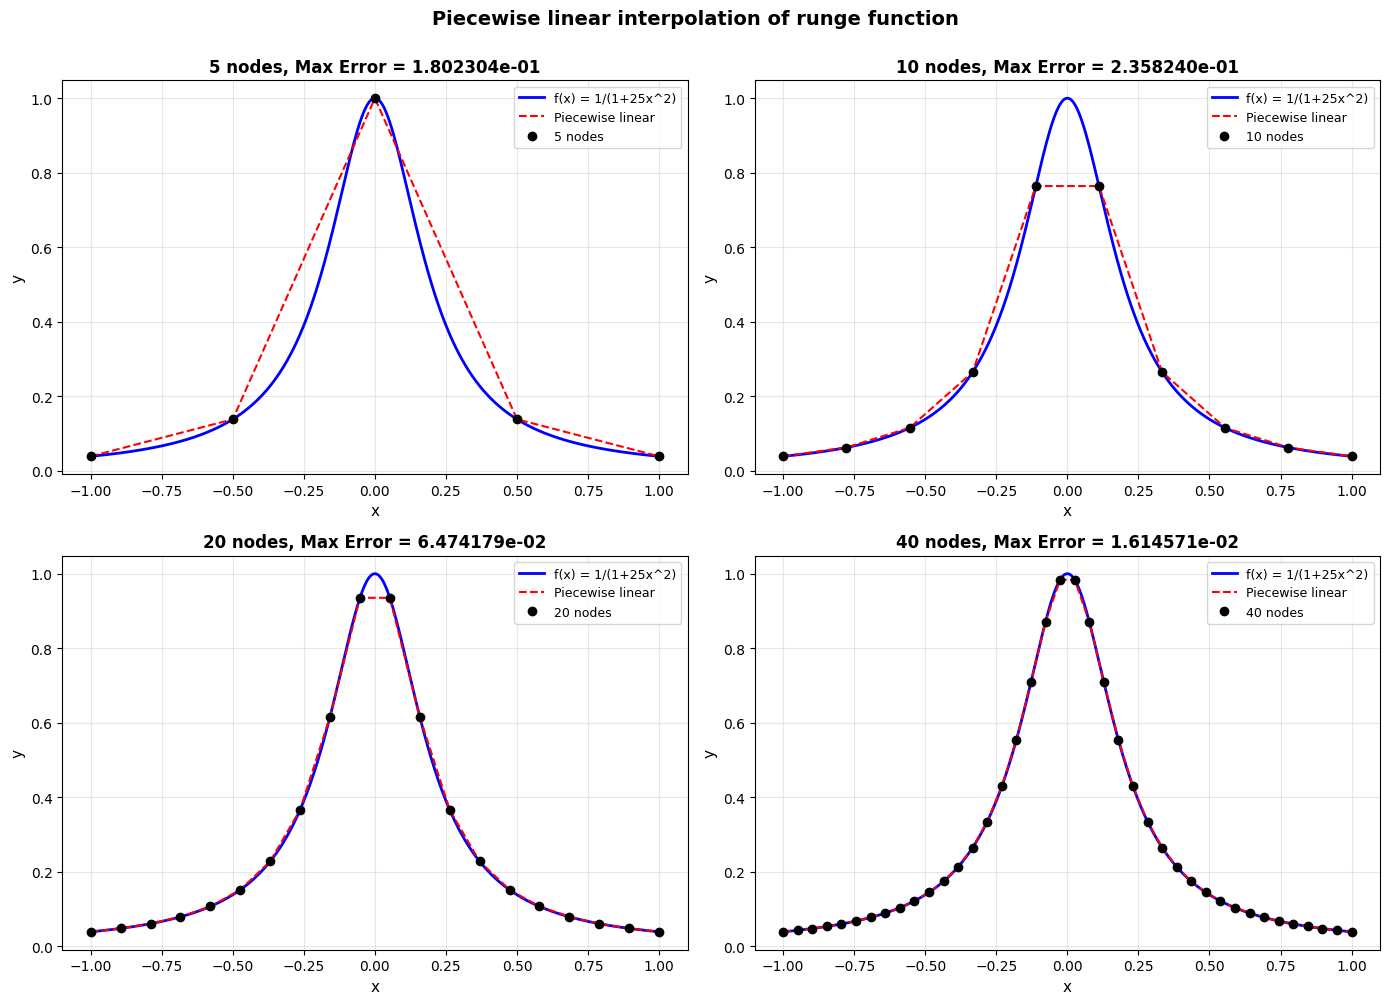


Example 3: Piecewise linear interpolation of exp(cos(x))
 6 nodes: Max Error = 2.280915e-01
12 nodes: Max Error = 9.188894e-02
24 nodes: Max Error = 2.427042e-02
48 nodes: Max Error = 6.000886e-03


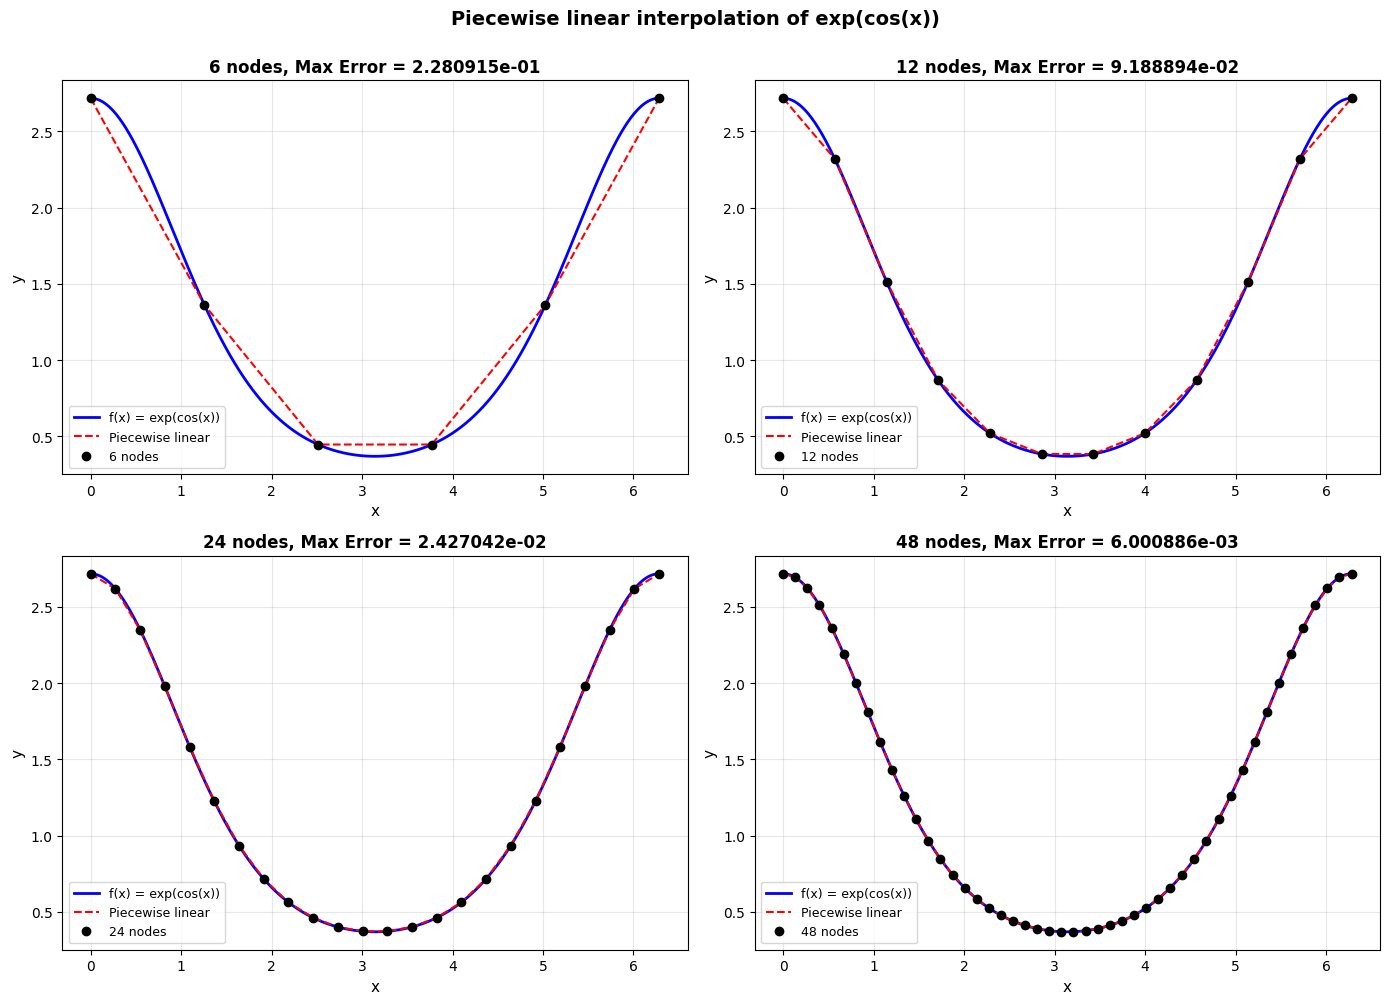


Example 4: Piecewise linear interpolation of step function
 5 nodes: Max Error = 1.995996e+00
10 nodes: Max Error = 9.909910e-01
20 nodes: Max Error = 9.809810e-01
40 nodes: Max Error = 9.609610e-01


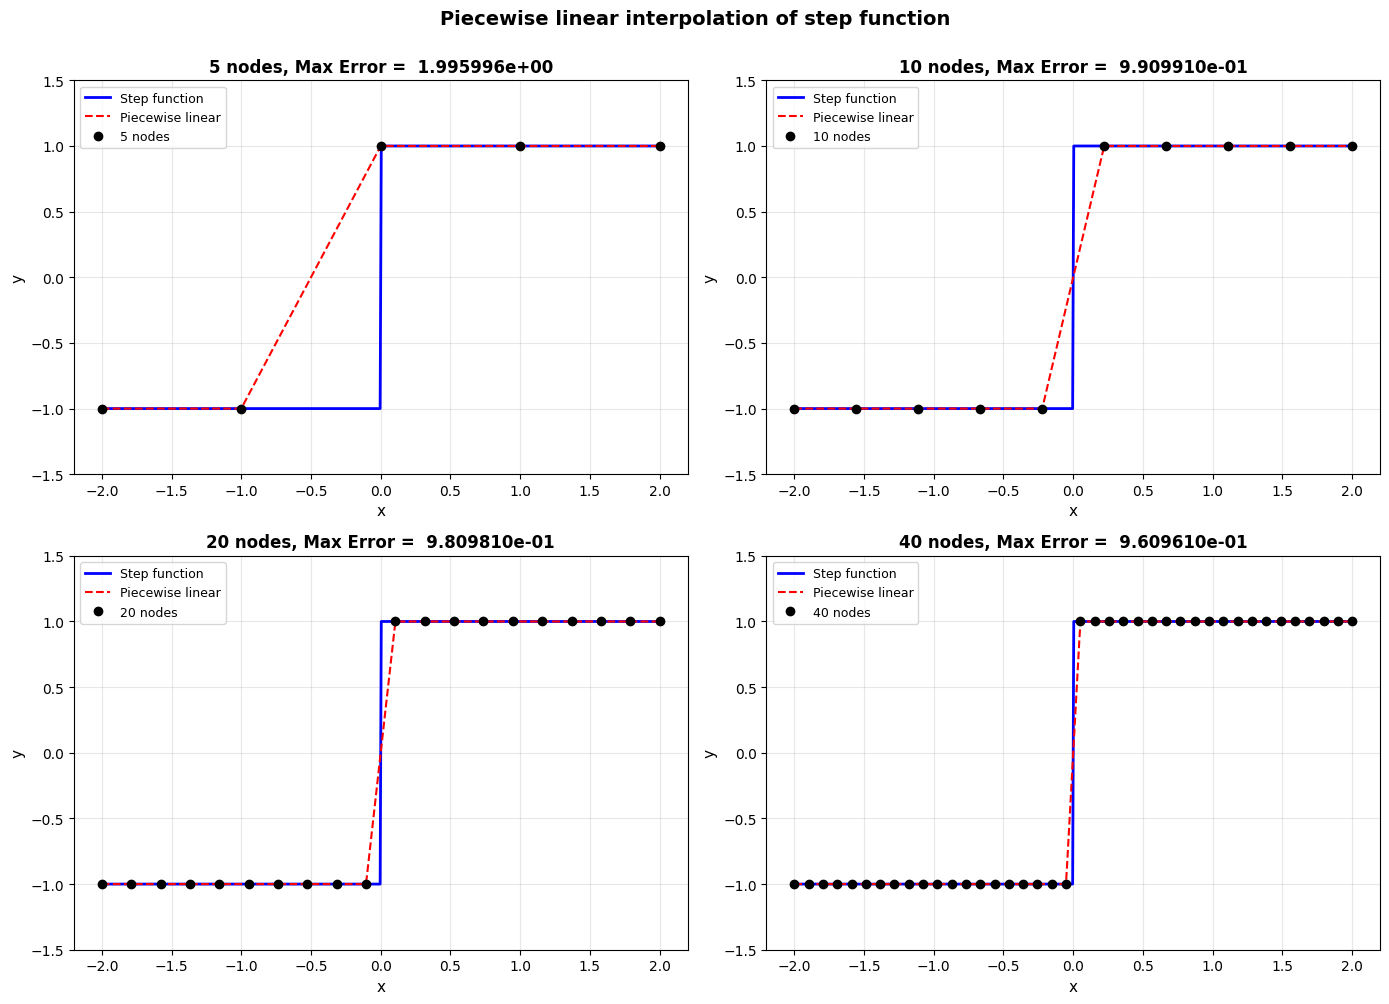

In [14]:
# Example 1: sin(x) on [0, 2*pi]
print("Example 1: Piecewise linear interpolation of sin(x) on [0, 2*pi]")

a1, b1 = 0, 2*np.pi
f1 = np.sin

# Different number of nodes
node_counts_1 = [5, 10, 20, 40]
x_plot1 = np.linspace(a1, b1, 500)
f_exact1 = f1(x_plot1)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for idx, num_nodes in enumerate(node_counts_1):
    nodes = np.linspace(a1, b1, num_nodes)
    values = f1(nodes)

    P_linear = PiecewiseLinearInterpolation(nodes, values)
    interp_values = P_linear(x_plot1)
    max_err, _, _ = compute_max_error(f1, P_linear, a1, b1, 1000)
    print(f"{num_nodes:2d} nodes: Max Error = {max_err:.6e}")

    axes[idx].plot(x_plot1, f_exact1, 'b-', linewidth=2, label='f(x) = sin(x)')
    axes[idx].plot(x_plot1, interp_values, 'r--', linewidth=1.5, label='Piecewise linear')
    axes[idx].plot(nodes, values, 'ko', markersize=6, label=f'{num_nodes} nodes')
    axes[idx].set_xlabel('x', fontsize=11)
    axes[idx].set_ylabel('y', fontsize=11)
    axes[idx].set_title(f'{num_nodes} nodes, Max Error = {max_err:.6e}',
                        fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Piecewise Linear Interpolation of sin(x)',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Example 2: Runge function 1/(1+25x^2) on [-1, 1]
print("\nExample 2: Piecewise linear interpolation of Runge function")
a2, b2 = -1, 1
f2 = lambda x: 1 / (1+25*x**2)

node_counts_2 = [5, 10, 20, 40]
x_plot2 = np.linspace(a2, b2, 500)
f_exact2 = f2(x_plot2)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, num_nodes in enumerate(node_counts_2):
    nodes = np.linspace(a2, b2, num_nodes)
    values = f2(nodes)

    P_linear = PiecewiseLinearInterpolation(nodes, values)
    interp_values = P_linear(x_plot2)
    max_err, _, _ = compute_max_error(f2, P_linear, a2, b2, 1000)

    print(f"{num_nodes:2d} nodes: Max Error = {max_err:.6e}")
    
    axes[idx].plot(x_plot2, f_exact2, 'b-', linewidth=2, label='f(x) = 1/(1+25x^2)')
    axes[idx].plot(x_plot2, interp_values, 'r--', linewidth=1.5, label='Piecewise linear')
    axes[idx].plot(nodes, values, 'ko', markersize=6, label=f'{num_nodes} nodes')
    axes[idx].set_xlabel('x', fontsize=11)
    axes[idx].set_ylabel('y', fontsize=11)
    axes[idx].set_title(f'{num_nodes} nodes, Max Error = {max_err:.6e}',
                        fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Piecewise linear interpolation of runge function',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Example 3: exp(cos(x)) on [0, 2*pi]
print("\nExample 3: Piecewise linear interpolation of exp(cos(x))")
a3, b3 = 0, 2*np.pi
f3 = lambda x: np.exp(np.cos(x))

node_counts_3 = [6, 12, 24, 48]
x_plot3 = np.linspace(a3, b3, 500)
f_exact3 = f3(x_plot3)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, num_nodes in enumerate(node_counts_3):
    nodes = np.linspace(a3, b3, num_nodes)
    values = f3(nodes)

    P_linear = PiecewiseLinearInterpolation(nodes, values)
    interp_values = P_linear(x_plot3)
    max_err, _, _ = compute_max_error(f3, P_linear, a3, b3, 1000)

    print(f"{num_nodes:2d} nodes: Max Error = {max_err:.6e}")

    axes[idx].plot(x_plot3, f_exact3, 'b-', linewidth=2, label='f(x) = exp(cos(x))')
    axes[idx].plot(x_plot3, interp_values, 'r--', linewidth=1.5, label='Piecewise linear')
    axes[idx].plot(nodes, values, 'ko', markersize=6, label=f'{num_nodes} nodes')
    axes[idx].set_xlabel('x', fontsize=11)
    axes[idx].set_ylabel('y', fontsize=11)
    axes[idx].set_title(f'{num_nodes} nodes, Max Error = {max_err:.6e}',
                        fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Piecewise linear interpolation of exp(cos(x))',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Example 4: Step function
print("\nExample 4: Piecewise linear interpolation of step function")
a4, b4 = -2, 2
# Step function: -1 for x < 0, 1 for x >= 0
f4 = lambda x: np.where(x < 0, -1.0, 1.0)

node_counts_4 = [5, 10, 20, 40]
x_plot4 = np.linspace(a4, b4, 500)
f_exact4 = f4(x_plot4)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, num_nodes in enumerate(node_counts_4):
    nodes = np.linspace(a4, b4, num_nodes)
    values = f4(nodes)

    P_linear = PiecewiseLinearInterpolation(nodes, values)
    interp_values = P_linear(x_plot4)
    max_err, _, _ = compute_max_error(f4, P_linear, a4, b4, 1000)

    print(f"{num_nodes:2d} nodes: Max Error = {max_err:.6e}")

    axes[idx].plot(x_plot4, f_exact4, 'b-', linewidth=2, label='Step function')
    axes[idx].plot(x_plot4, interp_values, 'r--', linewidth=1.5, label='Piecewise linear')
    axes[idx].plot(nodes, values, 'ko', markersize=6, label=f'{num_nodes} nodes')
    axes[idx].set_xlabel('x', fontsize=11)
    axes[idx].set_ylabel('y', fontsize=11)
    axes[idx].set_title(f'{num_nodes} nodes, Max Error = {max_err: .6e}',
                        fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim([-1.5, 1.5])

plt.suptitle('Piecewise linear interpolation of step function',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


We can see that Piecewise linear interpolation simply connects consecutive points with straight lines. It never shows runge phenomenon, since there are no wild oscillations. So, it works well for runge function. Then, error decreases consistently as we add more nodes, but there is slower convergence than high-degree polynomials for smooth functions. 

Question 7


Example 1: Piecewise Quadratic interpolation of sin(x) on [0, 2*pi]
 5 nodes: Max Error = 2.105102e-01
 9 nodes: Max Error = 2.982313e-02
17 nodes: Max Error = 3.844061e-03
33 nodes: Max Error = 4.838344e-04


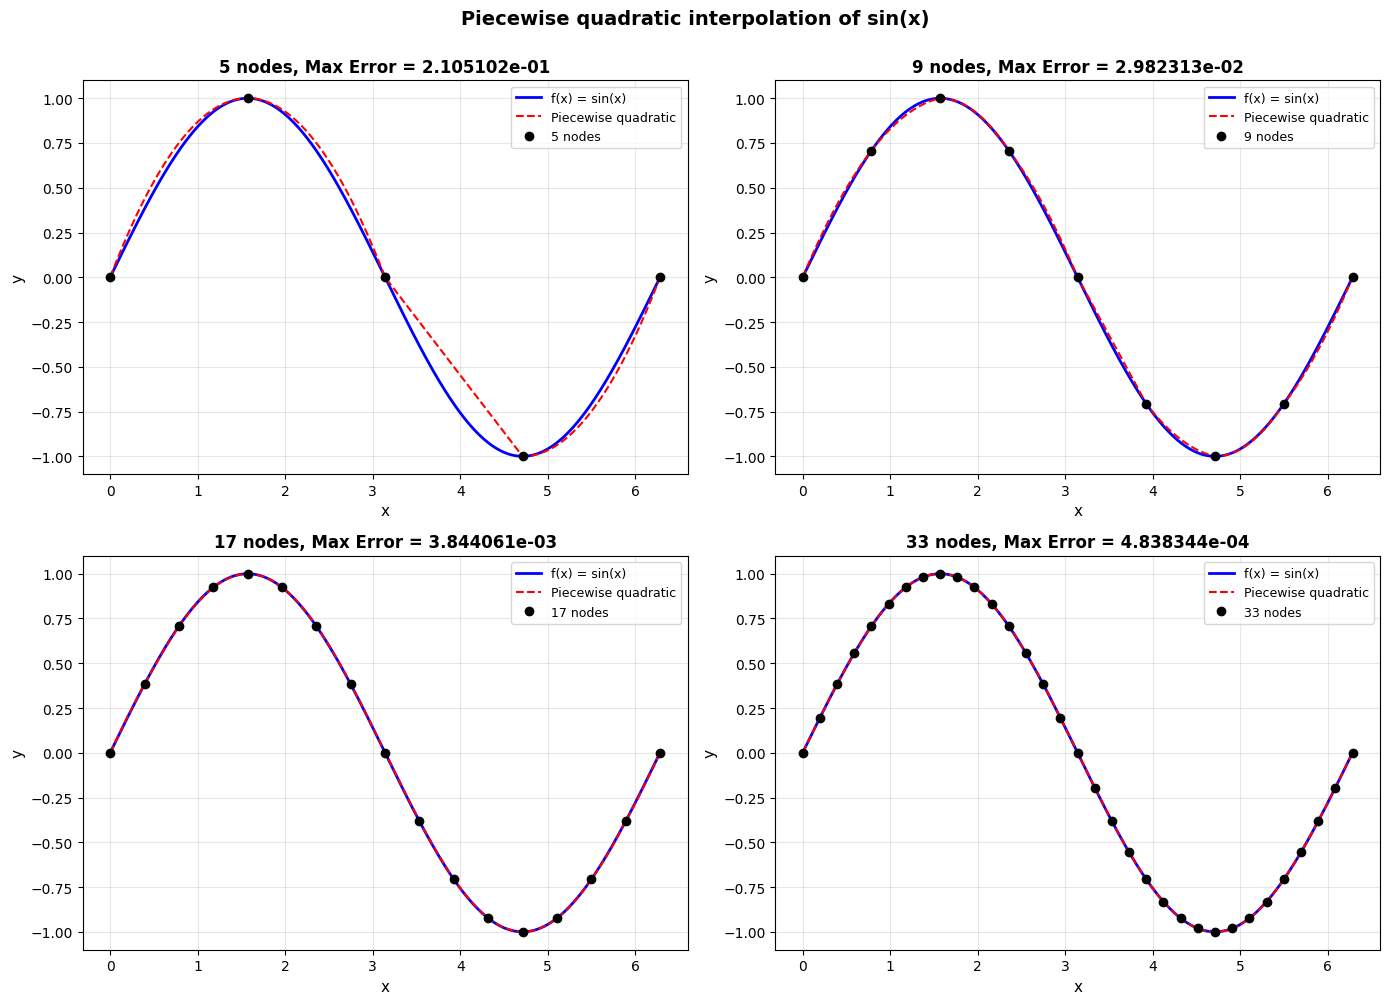


Example 2: Piecewise quadratic interpolation of runge function
 5 nodes: Max Error = 3.951420e-01
 9 nodes: Max Error = 1.408535e-01
17 nodes: Max Error = 4.777244e-02
33 nodes: Max Error = 8.253098e-03


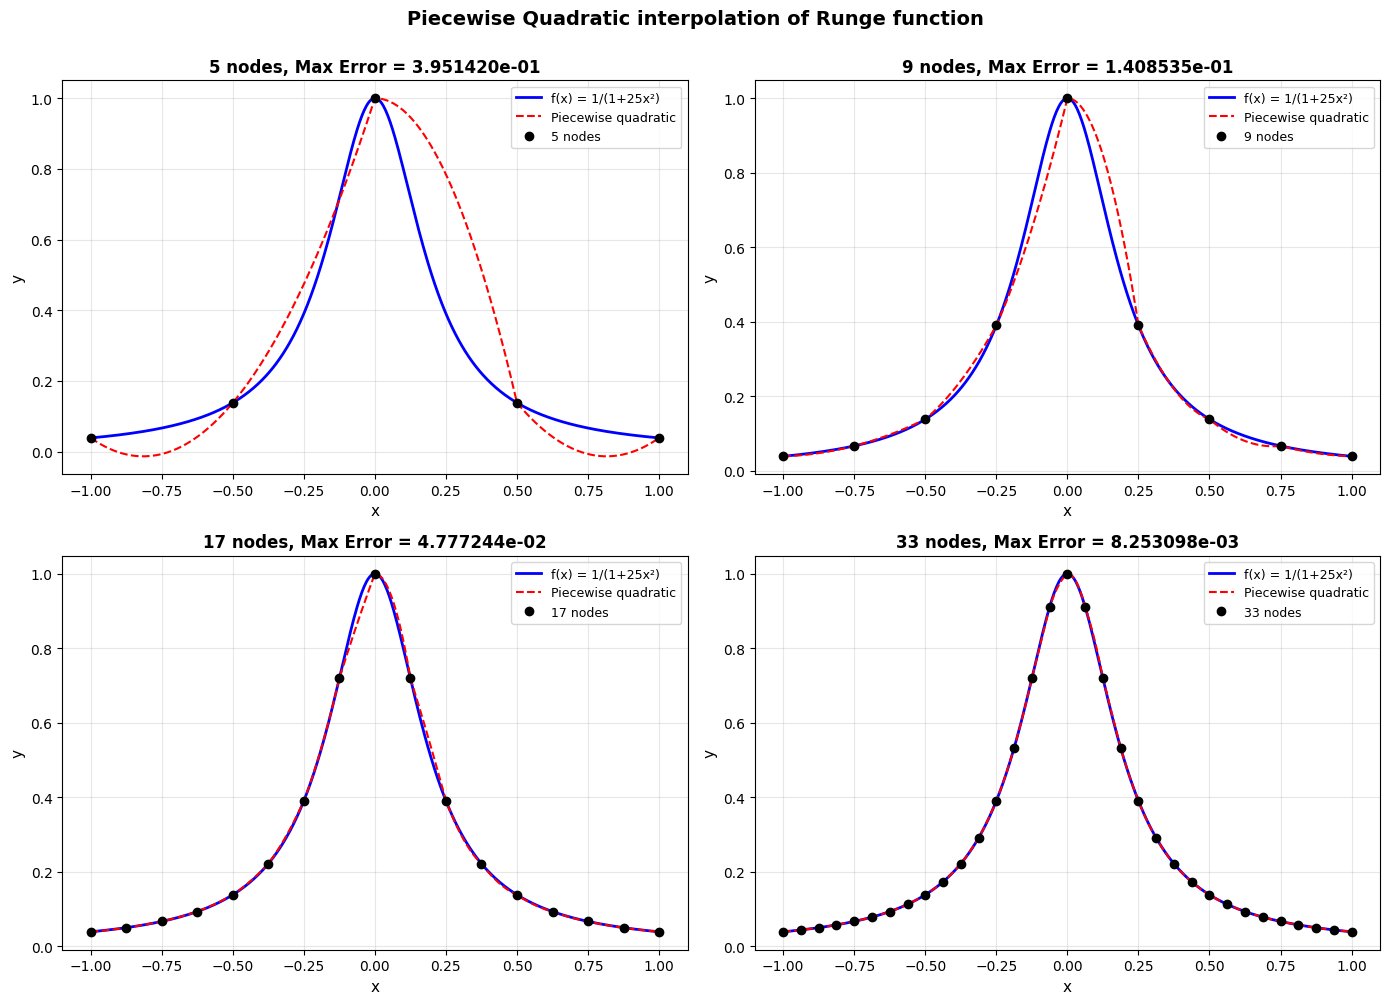

 7 nodes: Max Error = 2.059920e-01
13 nodes: Max Error = 3.430964e-02
25 nodes: Max Error = 4.545307e-03
49 nodes: Max Error = 5.817652e-04


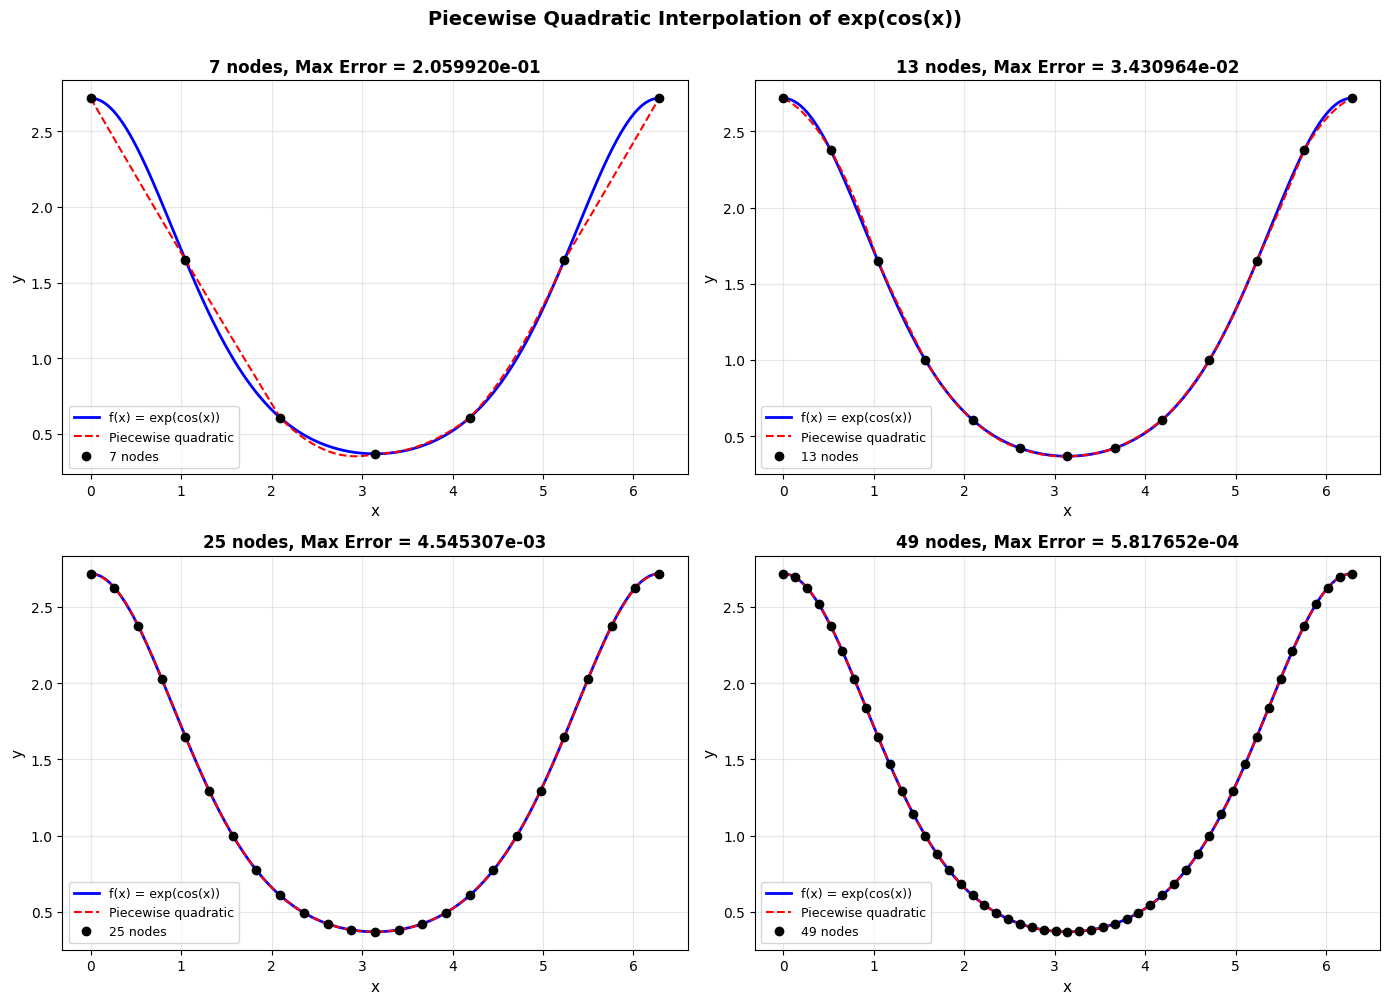


Example 4: x^3 - 3x on [-2, 2]: A function with inflection point
 5 nodes: Max Error = 3.849001e-01
 9 nodes: Max Error = 4.811251e-02
17 nodes: Max Error = 6.014064e-03
33 nodes: Max Error = 7.517580e-04


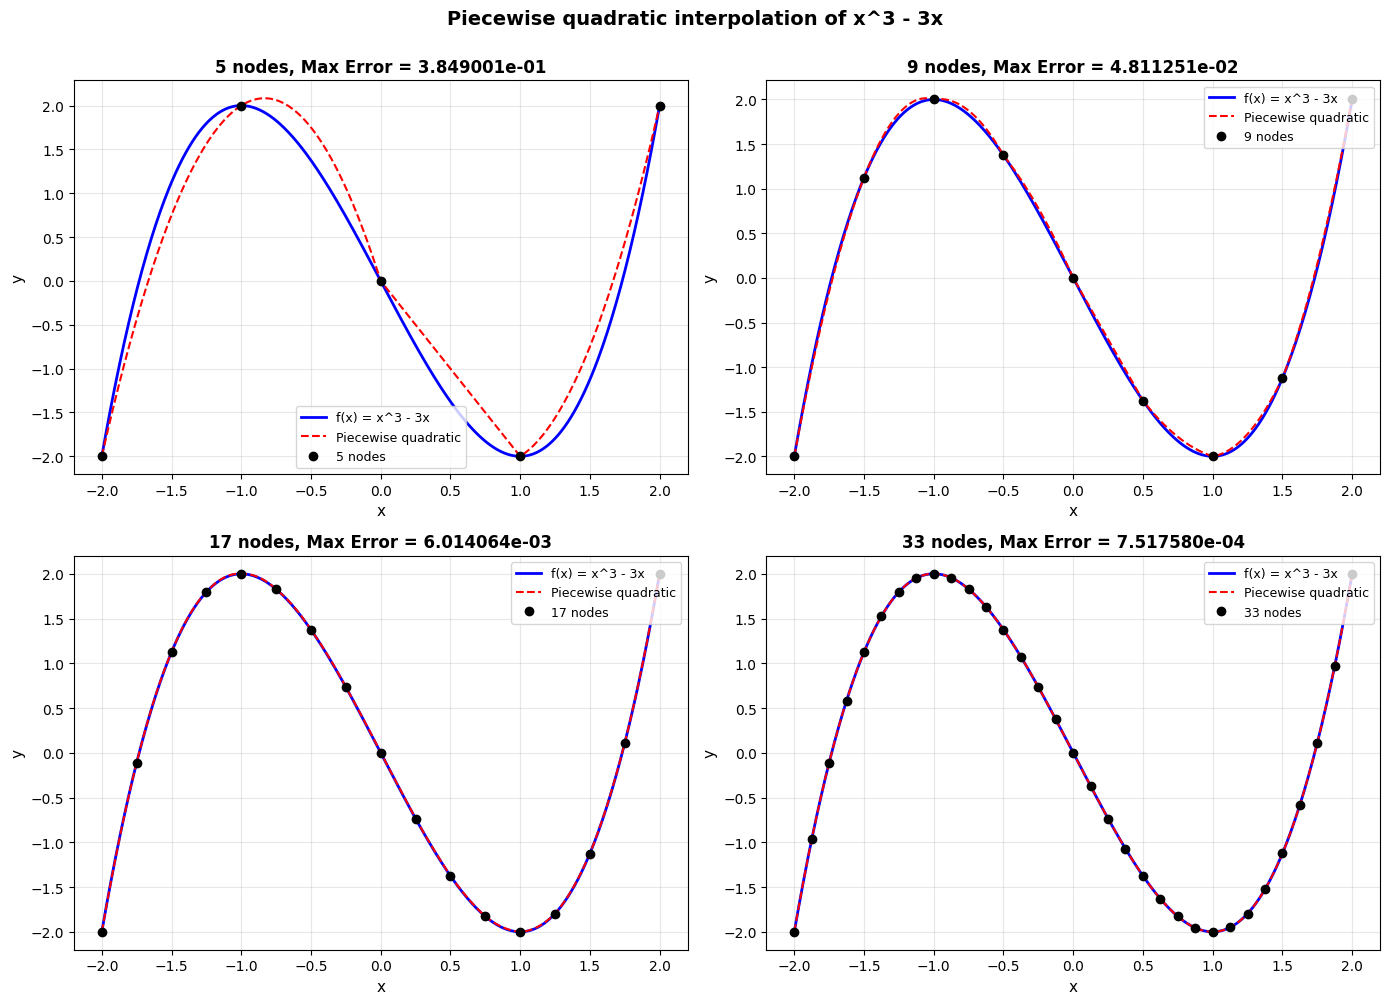

In [15]:
class PiecewiseQuadraticInterpolation:
    """ 
    Piecewise quadratic interpolation with equally spaced nodes
    Each piece uses 3 consecutive nodes to form a quadratic polynomial
    """
    def __init__(self, nodes, values):
        # Initialize piecewise quadratic interpolation
        self.nodes = np.array(nodes)
        self.values = np.array(values)
        self.n = len(nodes)

    def _quadratic_interpolate(self, x, x0, x1, x2, f0, f1, f2):
        """ 
        Evaluate quadratic Lagrange interpolation through 3 points
        """
        # Lagrange basis polynomial L0
        L0 = ((x - x1) * (x - x2)) / ((x0 - x1) * (x0 - x2))

        # Lagrange basis polynomial L1
        L1 = ((x - x0) * (x - x2)) / ((x1 - x0) * (x1 - x2))

        # Lagrange basis polynomial L2
        L2 = ((x - x0) * (x - x1)) / ((x2 - x0) * (x2 - x1))

        # Quadratic interpolation
        return f0 * L0 + f1 * L1 + f2 * L2
    
    def __call__(self, x):
        """ 
        Evaluate piecewise quadratic interpolation at points x 
        We divide interval into pieces, each using 3 consecutive nodes
        For n nodes, we have n-2 quadratic pieces
        """
        x = np.atleast_1d(x)
        result = np.zeros_like(x, dtype=float)

        for idx, x_val in enumerate(x):
            """ 
            Find which piece x_val is belonging to
            Create pieces [x0, x2], [x2, x4], ... for even spacing or 
            we can overlap pieces [x0, x2], [x1, x3], ...
            """
            # Use piece centered around x_val
            # Find closest interval midpoint
            piece_idx = np.searchsorted(self.nodes, x_val, side='right') - 1

            # Determine which 3 nodes to use
            if piece_idx <= 0:
                # Near start: use first 3 nodes
                i = 0
            elif piece_idx >= self.n - 2:
                # Near end: use last 3 nodes
                i = self.n - 3
            else:
                # Middle -> use centered triplet
                i = piece_idx - 1
            
            # Ensure i is valid
            i = max(0, min(i, self.n - 3))

            # Get the 3 nodes for this piece
            x0, x1, x2 = self.nodes[i], self.nodes[i+1], self.nodes[i+2]
            f0, f1, f2 = self.values[i], self.values[i+1], self.values[i+2]

            # Evaluate quadratic through these 3 points
            result[idx] = self._quadratic_interpolate(x_val, x0, x1, x2, f0, f1, f2)
        
        return result if len(result) > 1 else result[0]
    
def compute_max_error(f, interp, a, b, num_samples=1000):
    """ Compute max error over [a, b] """
    sample_points = np.linspace(a, b, num_samples)
    f_values = f(sample_points)
    interp_values = interp(sample_points)
    errors = np.abs(f_values - interp_values)
    max_error = np.max(errors)
    return max_error, sample_points, errors

""" Example 1: sin(x) on [0, 2*pi] """
print("\nExample 1: Piecewise Quadratic interpolation of sin(x) on [0, 2*pi]")
a1, b1 = 0, 2*np.pi
f1 = np.sin

# Different number of nodes
node_counts_1 = [5, 9, 17, 33]
x_plot1 = np.linspace(a1, b1, 500)
f_exact1 = f1(x_plot1)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, num_nodes in enumerate(node_counts_1):
    nodes = np.linspace(a1, b1, num_nodes)
    values = f1(nodes)

    P_quad = PiecewiseQuadraticInterpolation(nodes, values)
    interp_values = P_quad(x_plot1)
    max_err, _, _ = compute_max_error(f1, P_quad, a1, b1, 1000)

    print(f"{num_nodes:2d} nodes: Max Error = {max_err:.6e}")
    
    axes[idx].plot(x_plot1, f_exact1, 'b-', linewidth=2, label='f(x) = sin(x)')
    axes[idx].plot(x_plot1, interp_values, 'r--', linewidth=1.5, label='Piecewise quadratic')
    axes[idx].plot(nodes, values, 'ko', markersize=6, label=f'{num_nodes} nodes')
    axes[idx].set_xlabel('x', fontsize=11)
    axes[idx].set_ylabel('y', fontsize=11)
    axes[idx].set_title(f'{num_nodes} nodes, Max Error = {max_err:.6e}',
                        fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Piecewise quadratic interpolation of sin(x)',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

""" Example 2: Runge function """
print("\nExample 2: Piecewise quadratic interpolation of runge function")
a2, b2 = -1, 1
f2 = lambda x: 1 / (1+25*x**2)

node_counts_2 = [5, 9, 17, 33]
x_plot2 = np.linspace(a2, b2, 500)
f_exact2 = f2(x_plot2)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, num_nodes in enumerate(node_counts_2):
    nodes = np.linspace(a2, b2, num_nodes)
    values = f2(nodes)
    
    P_quad = PiecewiseQuadraticInterpolation(nodes, values)
    interp_values = P_quad(x_plot2)
    max_err, _, _ = compute_max_error(f2, P_quad, a2, b2, 1000)
    
    print(f"{num_nodes:2d} nodes: Max Error = {max_err:.6e}")
    
    axes[idx].plot(x_plot2, f_exact2, 'b-', linewidth=2, label='f(x) = 1/(1+25x²)')
    axes[idx].plot(x_plot2, interp_values, 'r--', linewidth=1.5, label='Piecewise quadratic')
    axes[idx].plot(nodes, values, 'ko', markersize=6, label=f'{num_nodes} nodes')
    axes[idx].set_xlabel('x', fontsize=11)
    axes[idx].set_ylabel('y', fontsize=11)
    axes[idx].set_title(f'{num_nodes} nodes, Max Error = {max_err:.6e}', 
                       fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Piecewise Quadratic interpolation of Runge function',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

""" Example 3: exp(cos(x)) on [0, 2*pi] """
a3, b3 = 0, 2*np.pi
f3 = lambda x: np.exp(np.cos(x))

node_counts_3 = [7, 13, 25, 49]
x_plot3 = np.linspace(a3, b3, 500)
f_exact3 = f3(x_plot3)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, num_nodes in enumerate(node_counts_3):
    nodes = np.linspace(a3, b3, num_nodes)
    values = f3(nodes)
    
    P_quad = PiecewiseQuadraticInterpolation(nodes, values)
    interp_values = P_quad(x_plot3)
    max_err, _, _ = compute_max_error(f3, P_quad, a3, b3, 1000)
    
    print(f"{num_nodes:2d} nodes: Max Error = {max_err:.6e}")
    
    axes[idx].plot(x_plot3, f_exact3, 'b-', linewidth=2, label='f(x) = exp(cos(x))')
    axes[idx].plot(x_plot3, interp_values, 'r--', linewidth=1.5, label='Piecewise quadratic')
    axes[idx].plot(nodes, values, 'ko', markersize=6, label=f'{num_nodes} nodes')
    axes[idx].set_xlabel('x', fontsize=11)
    axes[idx].set_ylabel('y', fontsize=11)
    axes[idx].set_title(f'{num_nodes} nodes, Max Error = {max_err:.6e}', 
                       fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Piecewise Quadratic Interpolation of exp(cos(x))',
             fontsize=14, fontweight='bold', y = 1.00)
plt.tight_layout()
plt.show()

""" Example 4: Smooth functions with different curvatures """
print("\nExample 4: x^3 - 3x on [-2, 2]: A function with inflection point")

a4, b4 = -2, 2
f4 = lambda x: x**3 -3*x
node_counts_4 = [5, 9, 17, 33]
x_plot4 = np.linspace(a4, b4, 500)
f_exact4 = f4(x_plot4)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, num_nodes in enumerate(node_counts_4):
    nodes = np.linspace(a4, b4, num_nodes)
    values = f4(nodes)

    P_quad = PiecewiseQuadraticInterpolation(nodes, values)
    interp_values = P_quad(x_plot4)
    max_err, _, _ = compute_max_error(f4, P_quad, a4, b4, 1000)

    print(f"{num_nodes:2d} nodes: Max Error = {max_err:.6e}")
    axes[idx].plot(x_plot4, f_exact4, 'b-', linewidth=2, label='f(x) = x^3 - 3x')
    axes[idx].plot(x_plot4, interp_values, 'r--', linewidth=1.5, label='Piecewise quadratic')
    axes[idx].plot(nodes, values, 'ko', markersize=6, label=f'{num_nodes} nodes')
    axes[idx].set_xlabel('x', fontsize=11)
    axes[idx].set_ylabel('y', fontsize=11)
    axes[idx].set_title(f'{num_nodes} nodes, Max Error = {max_err:.6e}', 
                       fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Piecewise quadratic interpolation of x^3 - 3x',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

Piecewise quadratic interpolation is smoother than piecewise linear (curves instead of straight lines) and it still has discontinuities in second derivative at nodes.
There is also no runge phenomenon, it is much more stable than high-degree polynomial interpolation. 
Faster convergence than piecewise linear and more accurate than piecewise linear for the same number of nodes. It can also capture curvature of the function. 

Question 8


Nodes      Linear error         Quadratic error      Ratio     
5          2.348304e-01         3.527163e-01         0.67      
13         7.952941e-02         3.430964e-02         2.32      
25         2.236891e-02         4.545307e-03         4.92      
49         5.756708e-03         5.817652e-04         9.90      
97         1.449767e-03         7.288850e-05         19.89     
129        8.170582e-04         3.082778e-05         26.50     

Nodes      Linear Error         Quadratic Error      Ratio     
------------------------------------------------------------
5          1.802304e-01         3.951420e-01         0.46      
13         6.504197e-02         7.468021e-02         0.87      
25         3.259732e-02         1.853329e-02         1.76      
49         1.005967e-02         2.537628e-03         3.96      
97         2.651442e-03         3.336556e-04         7.95      
129        1.494559e-03         1.413941e-04         10.57     


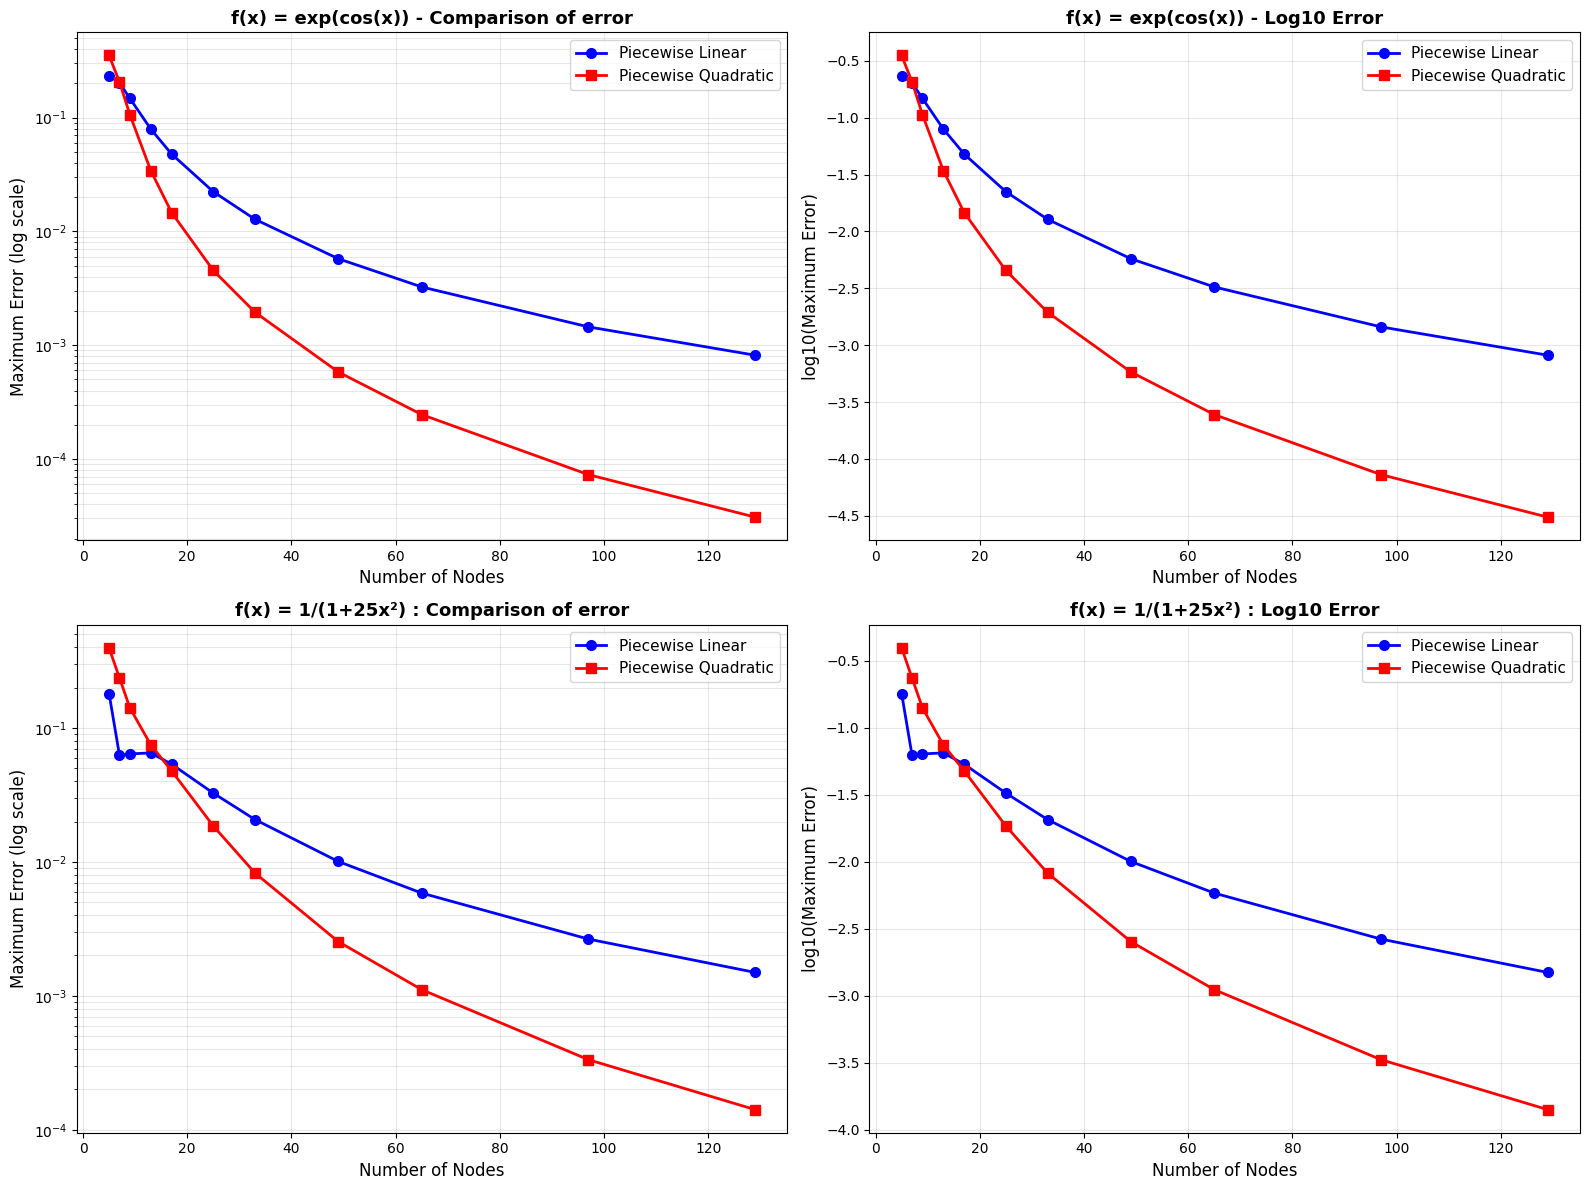

In [21]:
# Functions from question 3: exp(cos(x))
a1, b1 = 0, 2*np.pi
f1 = lambda x: np.exp(np.cos(x))

node_counts_1 = np.array([5, 7, 9, 13, 17, 25, 33, 49, 65, 97, 129])
errors_linear_1 = []
errors_quad_1 = []
print(f"\n{'Nodes':<10} {'Linear error':<20} {'Quadratic error':<20} {'Ratio':<10}")

for num_nodes in node_counts_1:
    nodes = np.linspace(a1, b1, num_nodes)
    values = f1(nodes)
    
    # Piecewise linear
    P_linear = PiecewiseLinearInterpolation(nodes, values)
    err_linear, _, _ = compute_max_error(f1, P_linear, a1, b1, 1000)
    errors_linear_1.append(err_linear)
    
    # Piecewise quadratic
    P_quad = PiecewiseQuadraticInterpolation(nodes, values)
    err_quad, _, _ = compute_max_error(f1, P_quad, a1, b1, 1000)
    errors_quad_1.append(err_quad)
    
    ratio = err_linear / err_quad
    
    if num_nodes in [5, 13, 25, 49, 97, 129]:
        print(f"{num_nodes:<10} {err_linear:<20.6e} {err_quad:<20.6e} {ratio:<10.2f}")
    
errors_linear_1 = np.array(errors_linear_1)
errors_quad_1 = np.array(errors_quad_1)

""" Function from question 4 : Runge function """
a2, b2 = -1, 1
f2 = lambda x: 1 / (1 + 25*x**2)

node_counts_2 = np.array([5, 7, 9, 13, 17, 25, 33, 49, 65, 97, 129])
errors_linear_2 = []
errors_quad_2 = []

print(f"\n{'Nodes':<10} {'Linear Error':<20} {'Quadratic Error':<20} {'Ratio':<10}")
print("-" * 60)

for num_nodes in node_counts_2:
    nodes = np.linspace(a2, b2, num_nodes)
    values = f2(nodes)
    
    # Piecewise linear
    P_linear = PiecewiseLinearInterpolation(nodes, values)
    err_linear, _, _ = compute_max_error(f2, P_linear, a2, b2, 1000)
    errors_linear_2.append(err_linear)
    
    # Piecewise quadratic
    P_quad = PiecewiseQuadraticInterpolation(nodes, values)
    err_quad, _, _ = compute_max_error(f2, P_quad, a2, b2, 1000)
    errors_quad_2.append(err_quad)
    
    ratio = err_linear / err_quad
    
    if num_nodes in [5, 13, 25, 49, 97, 129]:
        print(f"{num_nodes:<10} {err_linear:<20.6e} {err_quad:<20.6e} {ratio:<10.2f}")

errors_linear_2 = np.array(errors_linear_2)
errors_quad_2 = np.array(errors_quad_2)

""" Plot: Log of max errors """

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot exp(cos(x)) -> Semilogy
axes[0, 0].semilogy(node_counts_1, errors_linear_1, 'bo-', linewidth=2, 
                    markersize=7, label='Piecewise Linear')
axes[0, 0].semilogy(node_counts_1, errors_quad_1, 'rs-', linewidth=2, 
                    markersize=7, label='Piecewise Quadratic')
axes[0, 0].set_xlabel('Number of Nodes', fontsize=12)
axes[0, 0].set_ylabel('Maximum Error (log scale)', fontsize=12)
axes[0, 0].set_title('f(x) = exp(cos(x)) - Comparison of error', fontsize=13, fontweight='bold')
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3, which='both')

# Plot exp(cos(x)) -> Log10
axes[0, 1].plot(node_counts_1, np.log10(errors_linear_1), 'bo-', linewidth=2, 
                markersize=7, label='Piecewise Linear')
axes[0, 1].plot(node_counts_1, np.log10(errors_quad_1), 'rs-', linewidth=2, 
                markersize=7, label='Piecewise Quadratic')
axes[0, 1].set_xlabel('Number of Nodes', fontsize=12)
axes[0, 1].set_ylabel('log10(Maximum Error)', fontsize=12)
axes[0, 1].set_title('f(x) = exp(cos(x)) - Log10 Error', fontsize=13, fontweight='bold')
axes[0, 1].legend(fontsize=11)
axes[0, 1].grid(True, alpha=0.3)

# Plot Runge function -> Semilogy
axes[1, 0].semilogy(node_counts_2, errors_linear_2, 'bo-', linewidth=2, 
                    markersize=7, label='Piecewise Linear')
axes[1, 0].semilogy(node_counts_2, errors_quad_2, 'rs-', linewidth=2, 
                    markersize=7, label='Piecewise Quadratic')
axes[1, 0].set_xlabel('Number of Nodes', fontsize=12)
axes[1, 0].set_ylabel('Maximum Error (log scale)', fontsize=12)
axes[1, 0].set_title('f(x) = 1/(1+25x²) : Comparison of error', fontsize=13, fontweight='bold')
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(True, alpha=0.3, which='both')

# Plot Runge function -> Log10
axes[1, 1].plot(node_counts_2, np.log10(errors_linear_2), 'bo-', linewidth=2, 
                markersize=7, label='Piecewise Linear')
axes[1, 1].plot(node_counts_2, np.log10(errors_quad_2), 'rs-', linewidth=2, 
                markersize=7, label='Piecewise Quadratic')
axes[1, 1].set_xlabel('Number of Nodes', fontsize=12)
axes[1, 1].set_ylabel('log10(Maximum Error)', fontsize=12)
axes[1, 1].set_title('f(x) = 1/(1+25x²) : Log10 Error', fontsize=13, fontweight='bold')
axes[1, 1].legend(fontsize=11)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Comments:
Both methods show consistent error decrease with more nodes. Piecewise quadratic converges faster than the linear one. The log-linear plots show straight lines. 
Then, the error reduction rates are, for exp(cos(x)), for linear, if we double nodes, the error reduces by approx 4 times. For quadratic, error reduces by approx 7-8 times. For the runge function, linear reduces error by approx 4 times and quadratic by 7-8 times (as theory predicts). 
So, for smooth functions, both methods achieve good convergence rates, and quadratic is even 3 to 5 times more accurate for the same number of nodes.
Also, for the runge function, piecewise methods handle well, i.e. there is no instability. Quadratic shows faster convergence than linear.
So, piecewise quadratic gives a better accuracy for the same computational cost. Also, linear is simpler to implement but it needs more nodes for the same accuracy. They both avoid runge phenomenon. 